In [1]:
import os
c = os.getcwd()
os.chdir("../")
from Flocking import *
from graph_utils import *
from dynamics import *
os.chdir(c)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def get_net(Q):
    G = nx.Graph()

    for i in range(0,N):
        for j in range(0,N):
            if (np.linalg.norm(Q[i,:]-Q[j,:])<r):
                if(not G.has_edge(i,j)):
                    G.add_edge(i,j)
    return(G)

def rho_h(z,h=0.2):
    if (0 <= z and z < h):
        return 1
    if (h <= z and z <= 1):
        return (1/2)*(1+np.cos(np.pi*(z-h)/(1-h)))
    else:
        return 0
    
def sigma_norm(z,epsilon=0.1):
    return (1/epsilon)*(np.sqrt(1+epsilon*(np.linalg.norm(z))**2)-1)

def sigma_grad(z,epsilon=0.1):
    return z/(1+epsilon*sigma_norm(z,epsilon))

def sigma_1(z):
    return z/(np.sqrt(1+z**2))

def phi(z,a=5,b=5):
    c = np.abs(a-b)/(np.sqrt(4*a*b))
    return (1/2)*((a+b)*sigma_1(z+c)+(a-b))

def phi_alpha(z,d,r):
    r_alpha = sigma_norm(r)
    d_alpha = sigma_norm(d)
    return rho_h(z/r_alpha)*phi(z-d_alpha)

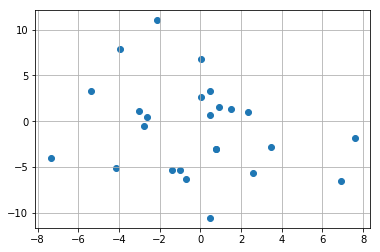

In [2]:
N=25
d=7
r=1.2*d
h=0.2
Q = np.sqrt(25)*np.random.randn(N,2)
P = (10)*np.random.rand(N,2)-1
plt.scatter(Q[:,0],Q[:,1])
plt.grid()

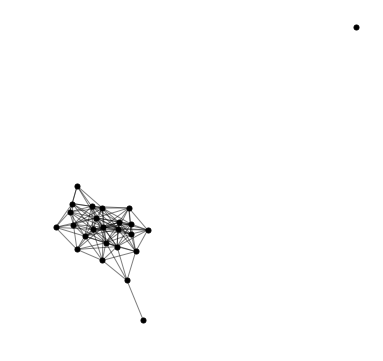

In [3]:
G = get_net(Q)
p=draw_graph(G,node_size=25,fig_size=6)

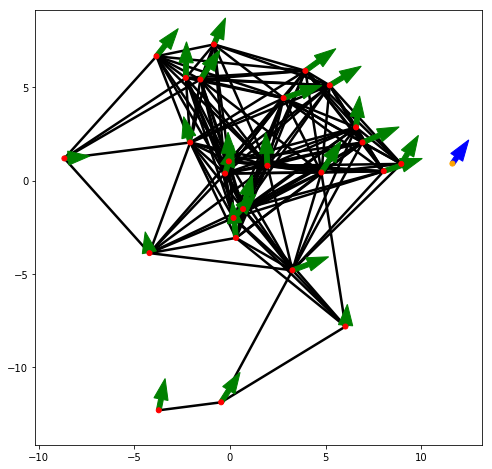

In [4]:
F = Flock(P_dot,
          number_of_agents=25,
          gamma_agent=True)

p = F.plot(Graph=True)

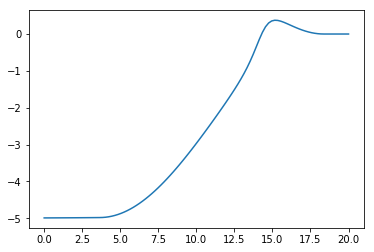

In [5]:
z = np.linspace(0,20,100)
y = np.zeros(len(z))
for i in range(0,len(y)):
    y[i] = phi_alpha(z[i],d,r)
    
plt.plot(z,y)

In [6]:
def time_step(Q,P,dt=0.01):
    G = get_net(Q)
    P = P + dt*P_dot(Q,G)
    Q = Q + dt*P
    return Q,P

In [7]:
T=10
dt=0.01
t=0
while t<T:
    Q,P = time_step(Q,P)
    t = t+dt

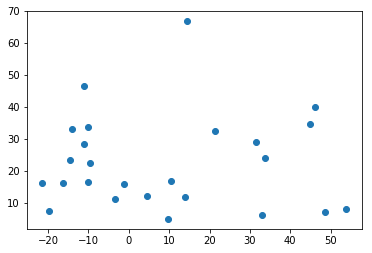

In [8]:
plt.scatter(Q[:,0],Q[:,1])

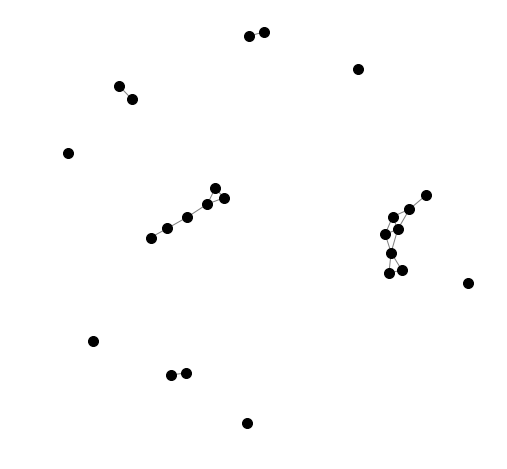

In [9]:
p=draw_graph(get_net(Q))

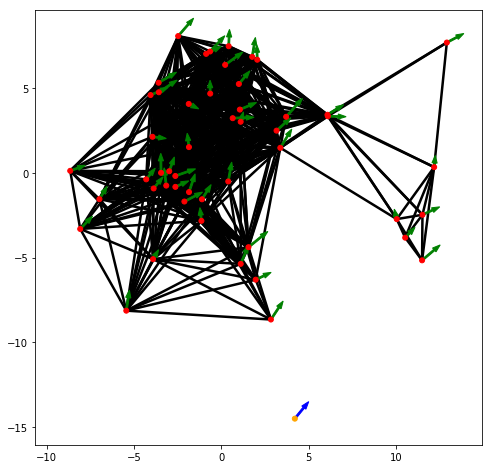

In [14]:
F = Flock(number_of_agents=50,
          inter_agent_distance=7,
          gamma_agent=True)

p = F.plot(arrow_width=0.1)

In [15]:
F.run_sim(T=10,save_data=True)

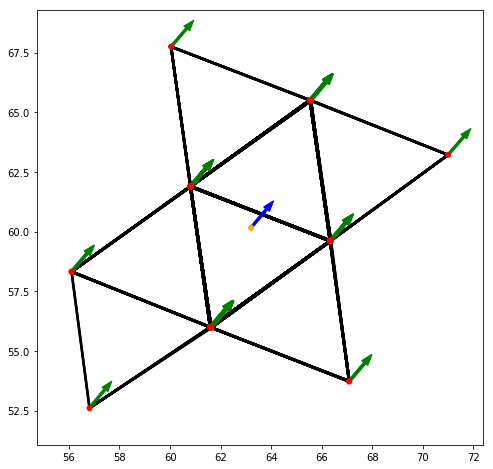

In [16]:
q=F.plot(arrow_width=0.1)

In [7]:
len(F.Q_sim)

1001

/home/harvey/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


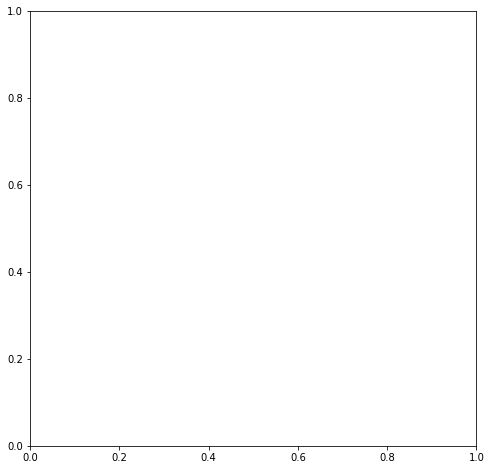

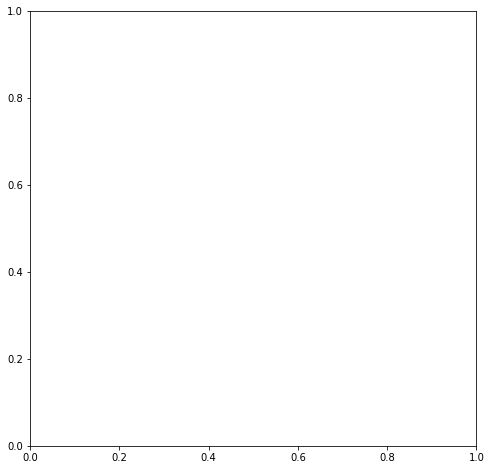

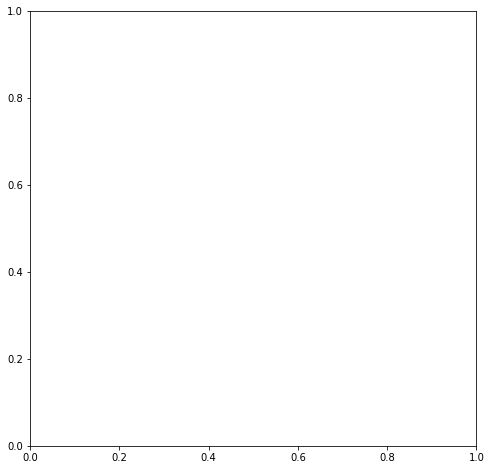

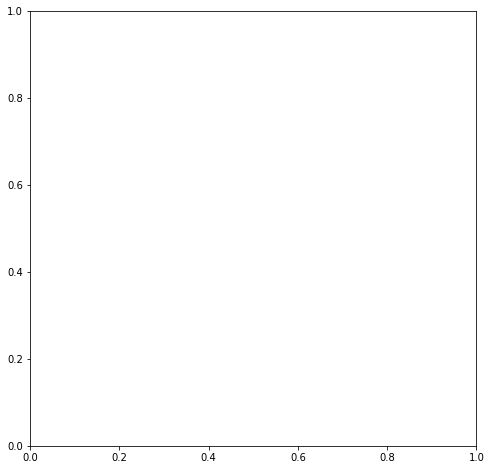

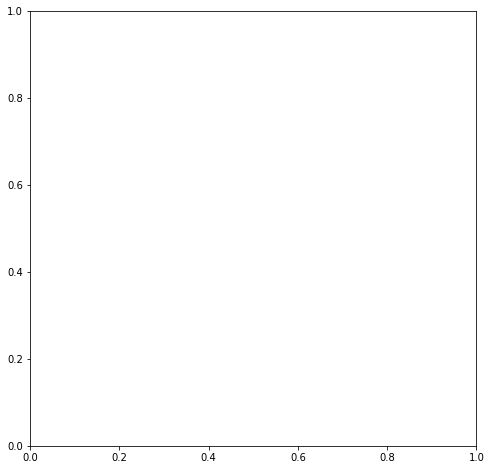

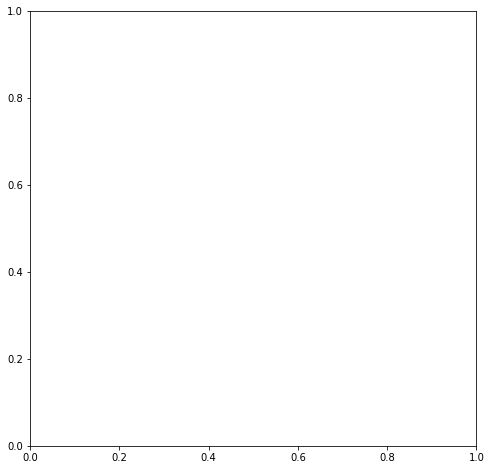

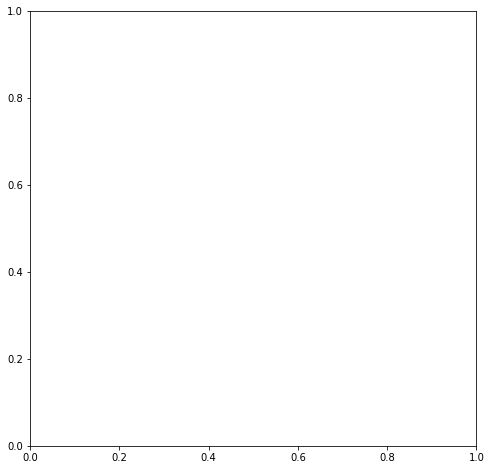

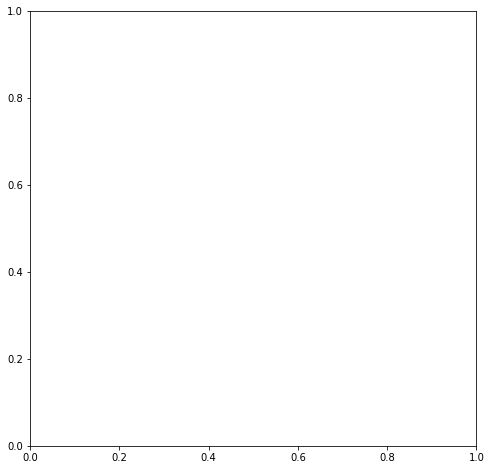

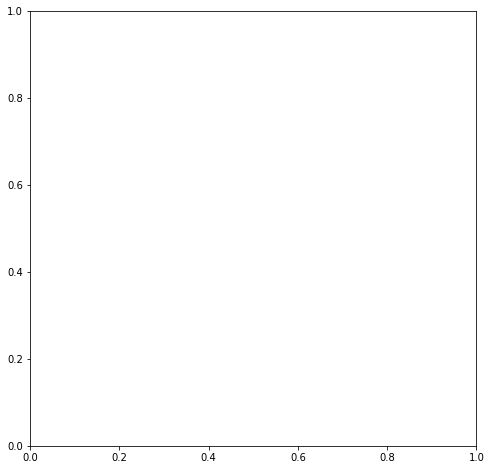

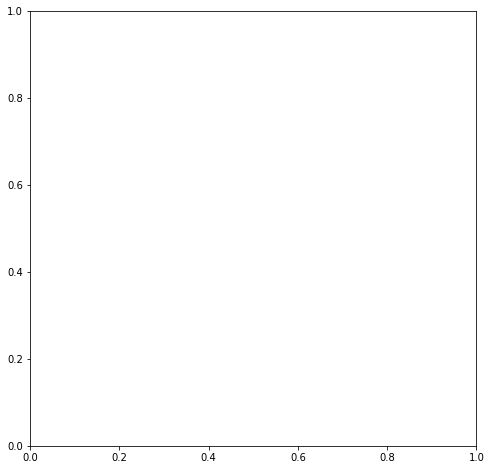

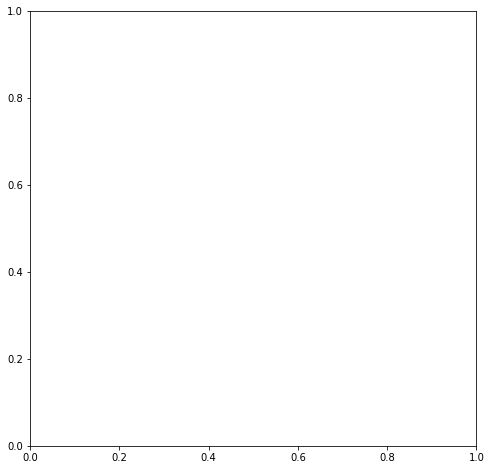

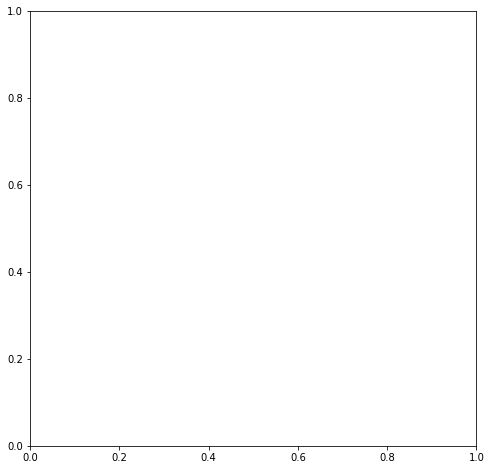

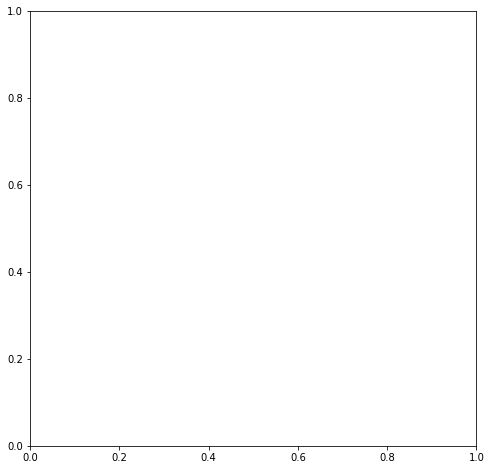

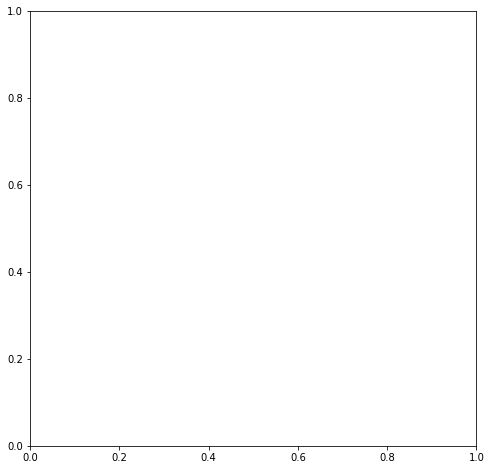

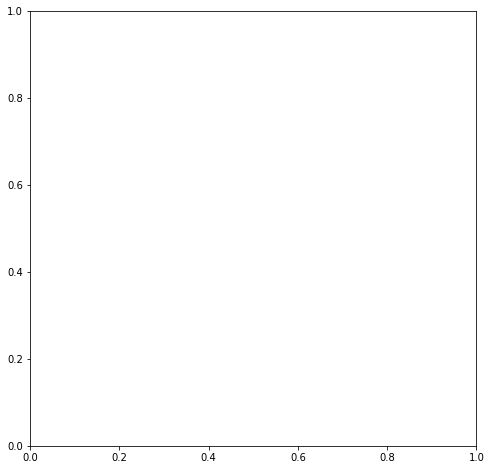

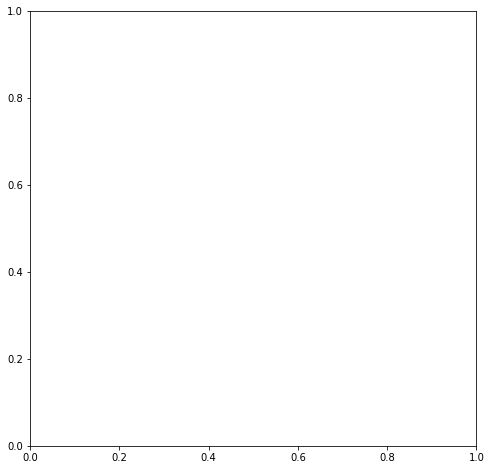

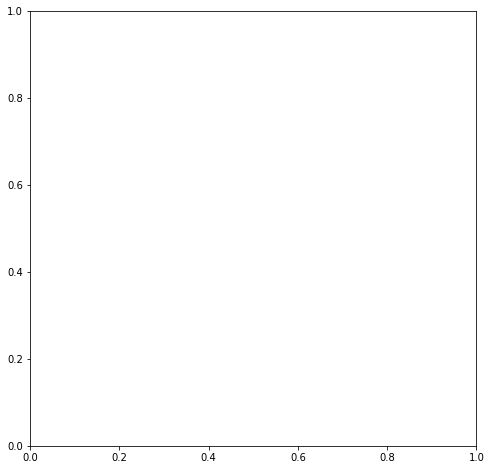

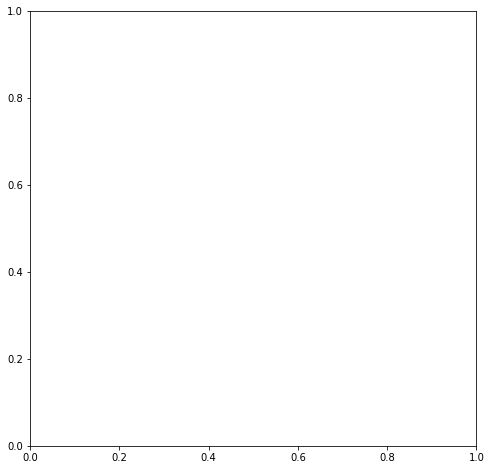

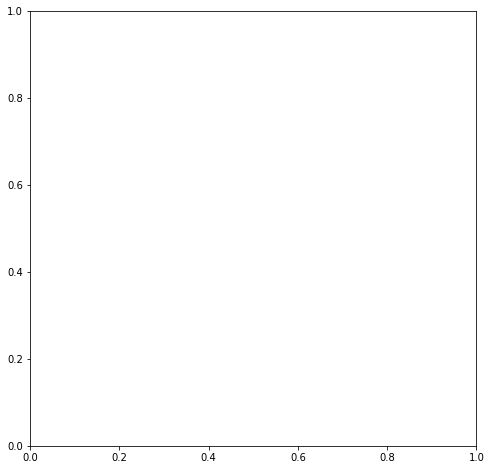

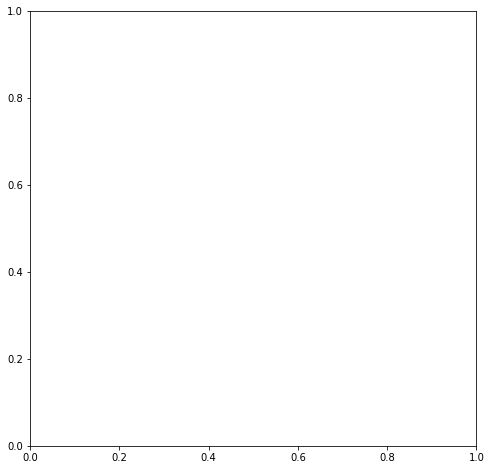

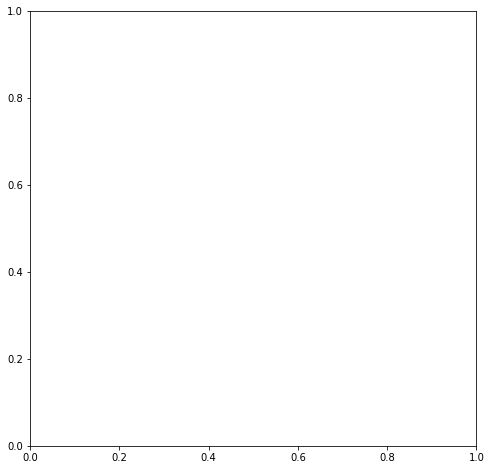

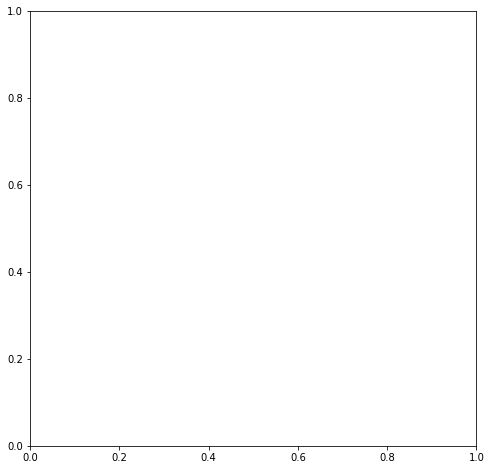

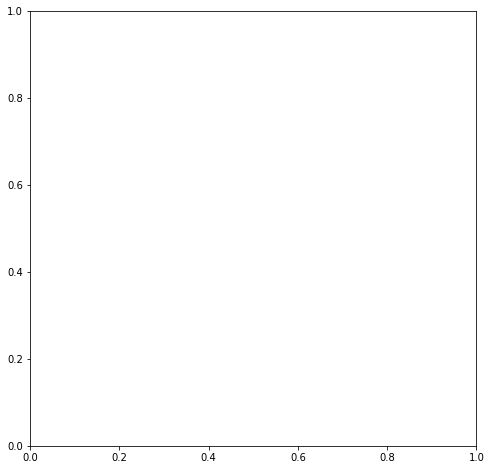

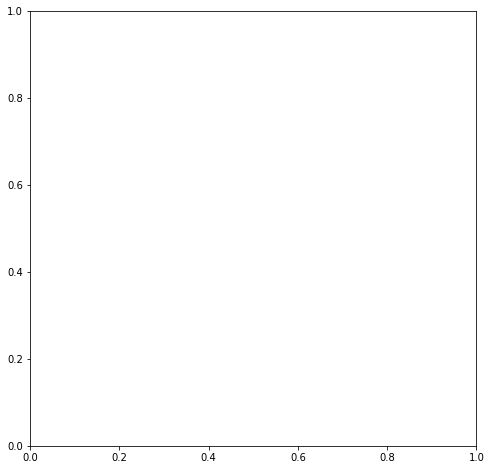

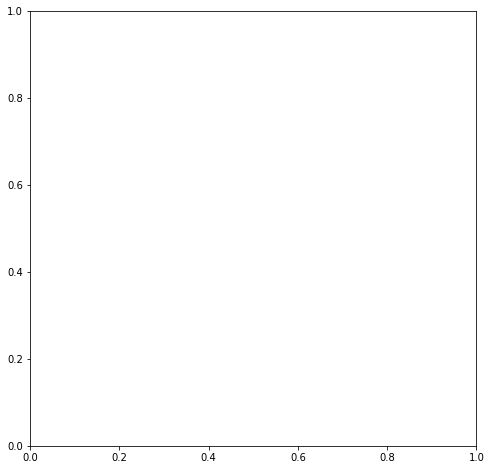

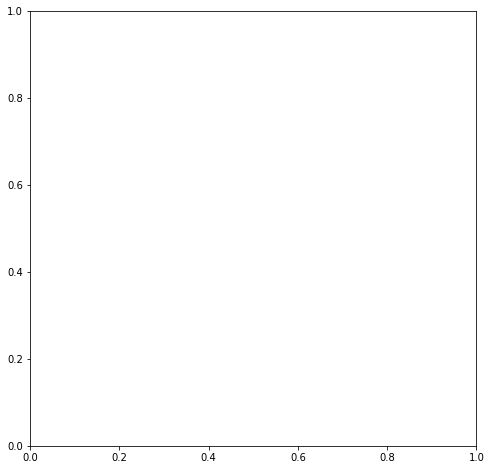

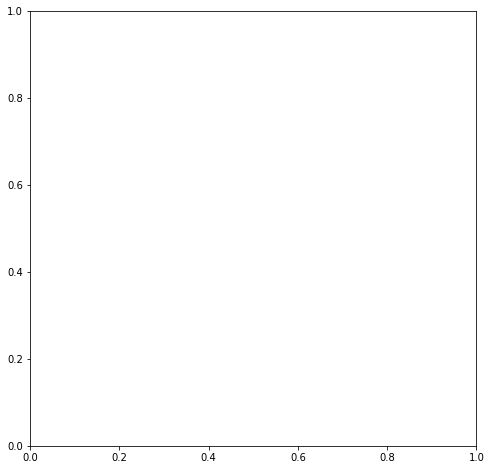

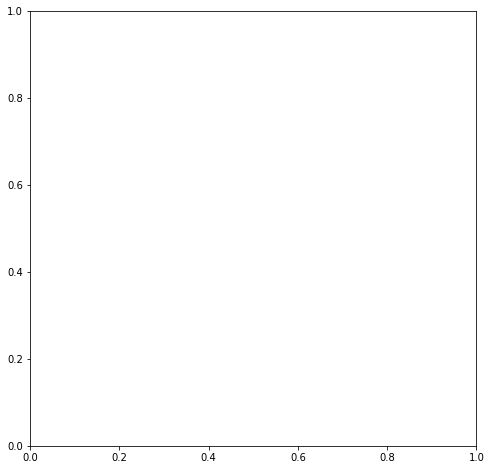

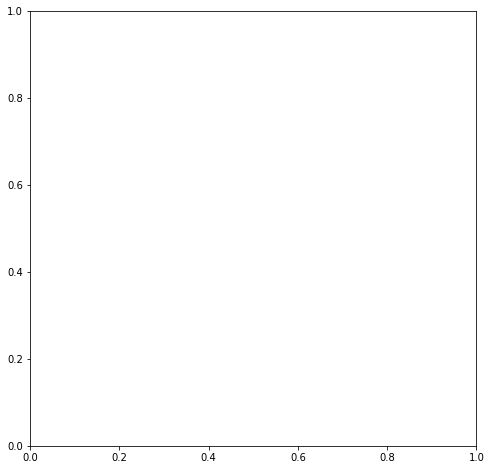

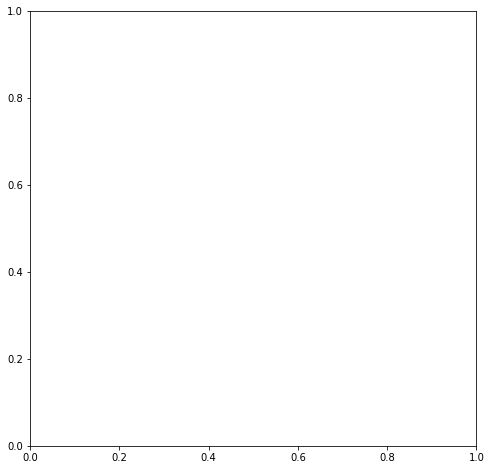

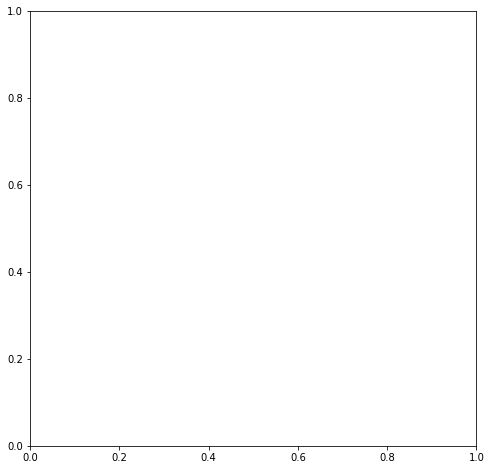

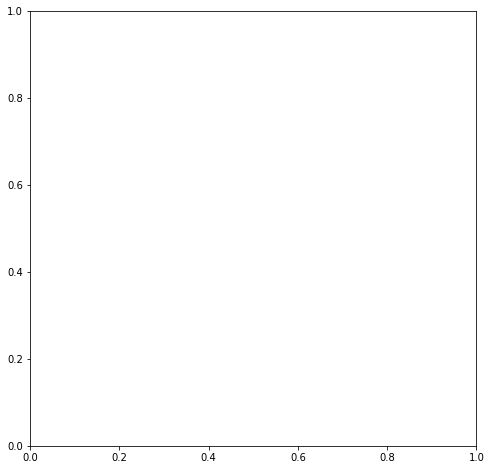

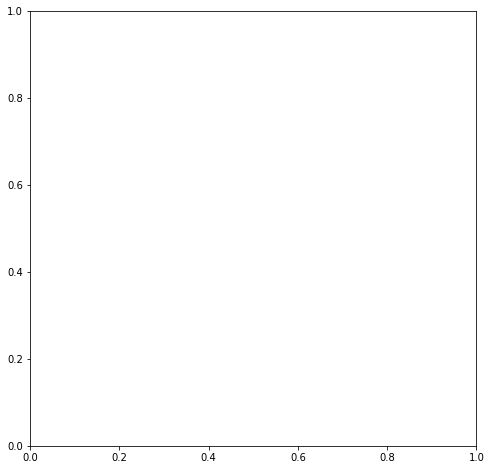

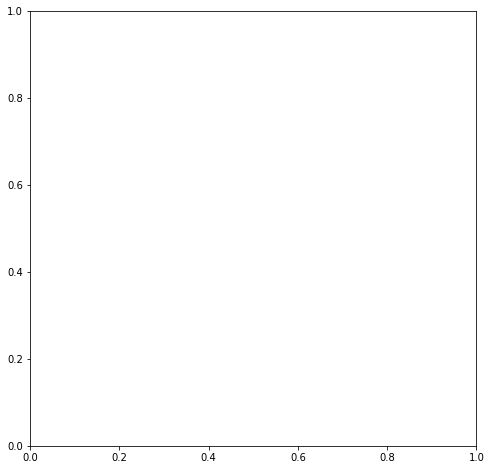

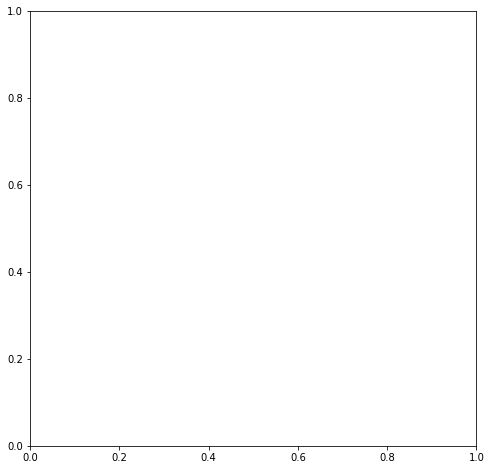

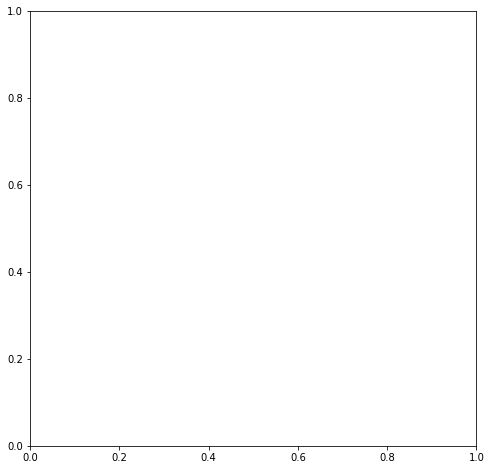

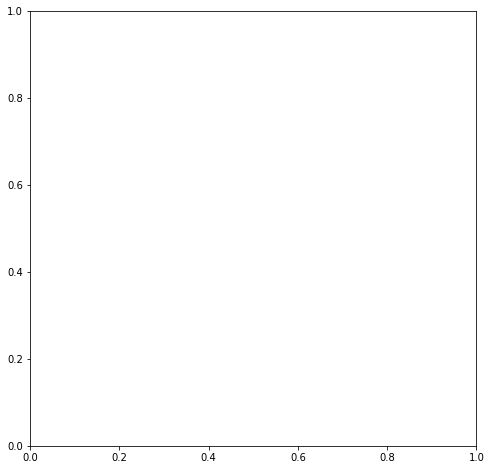

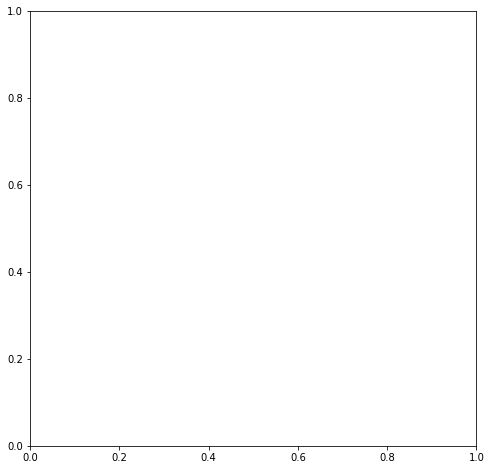

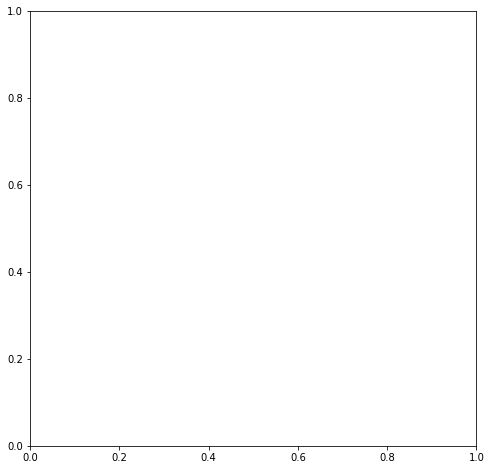

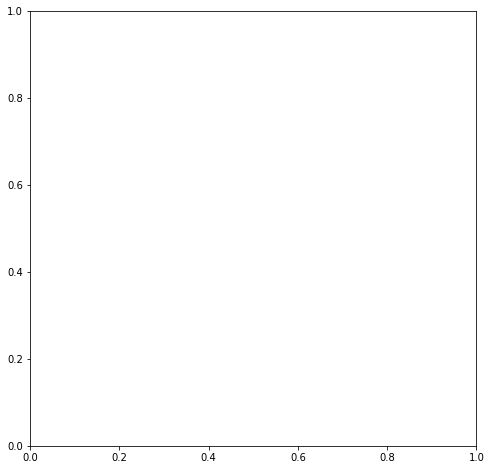

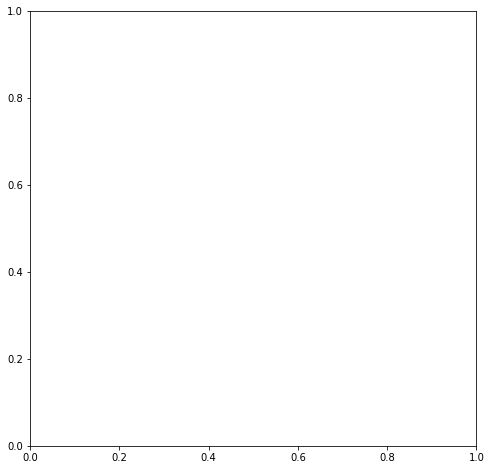

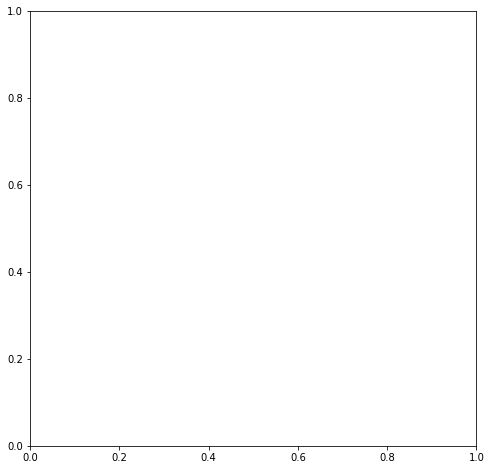

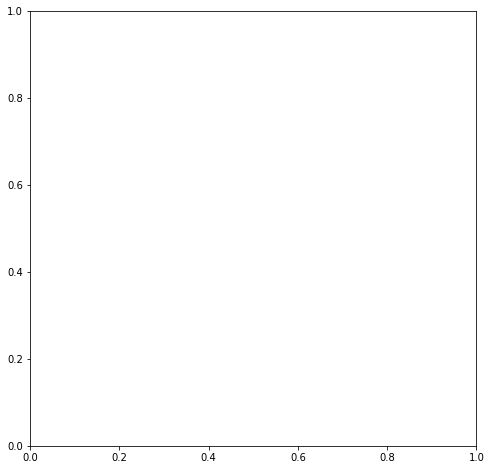

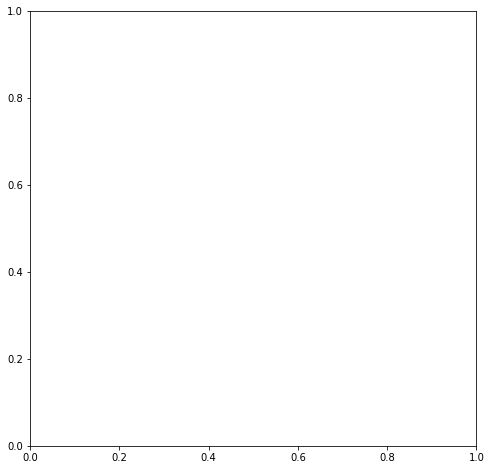

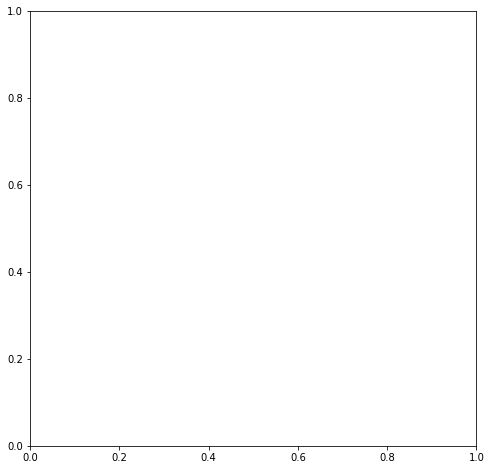

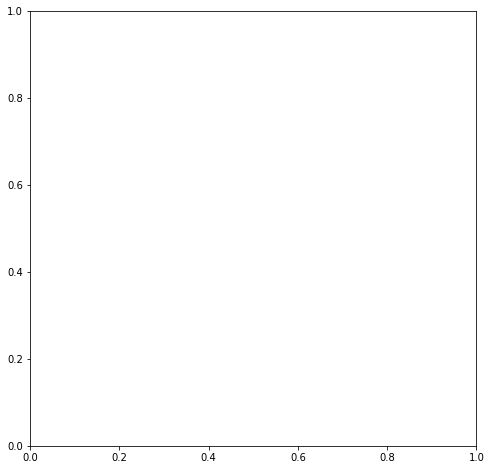

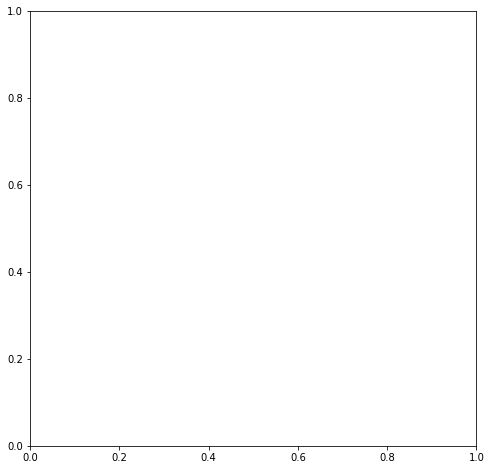

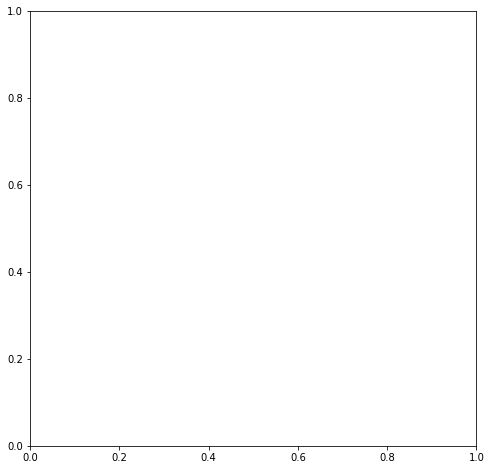

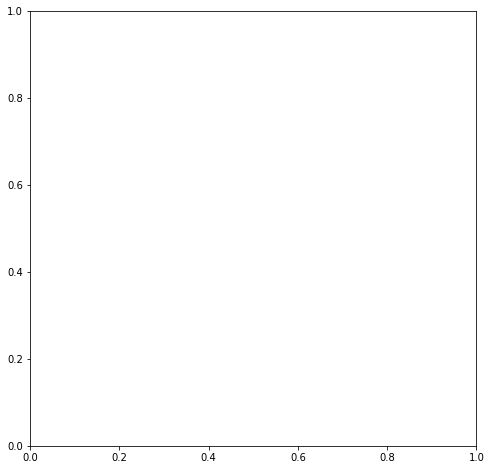

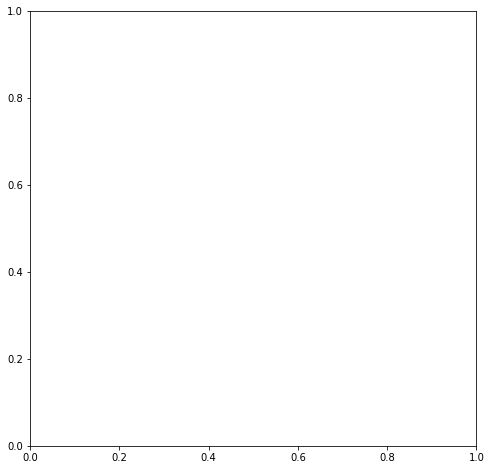

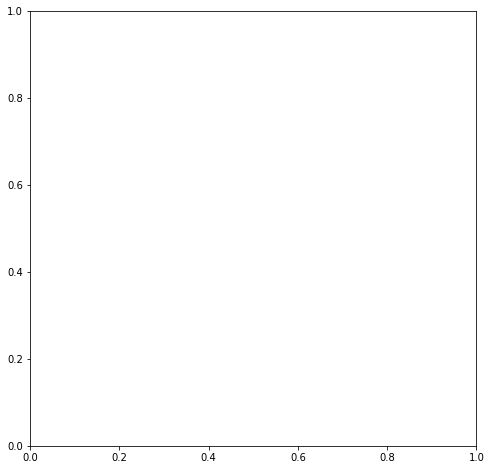

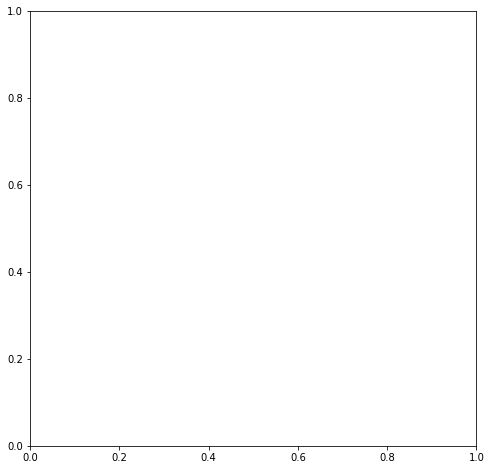

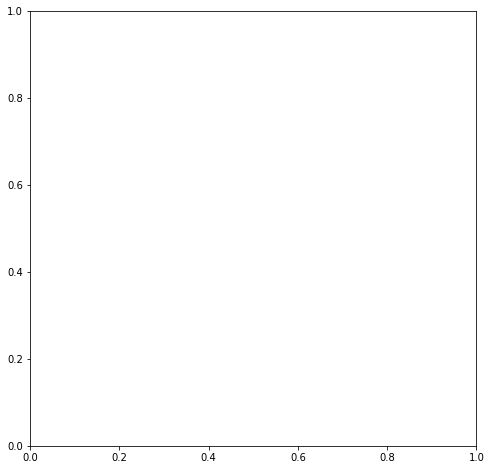

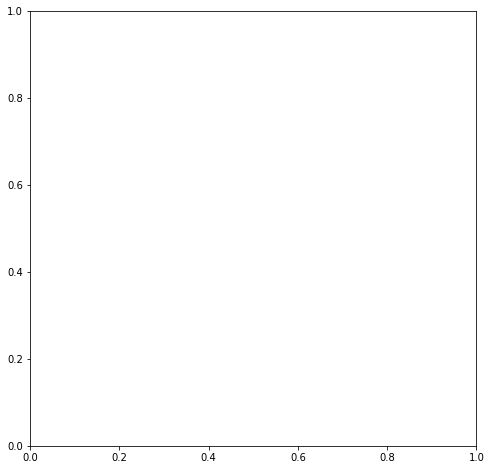

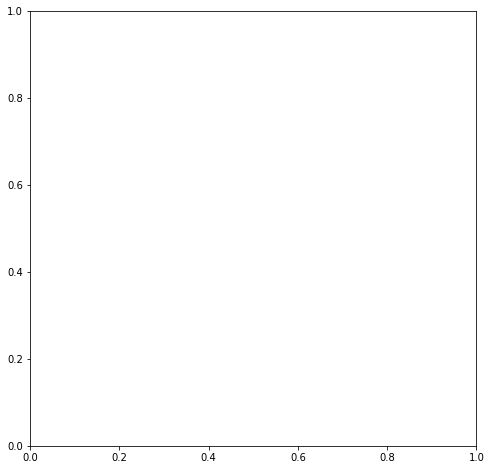

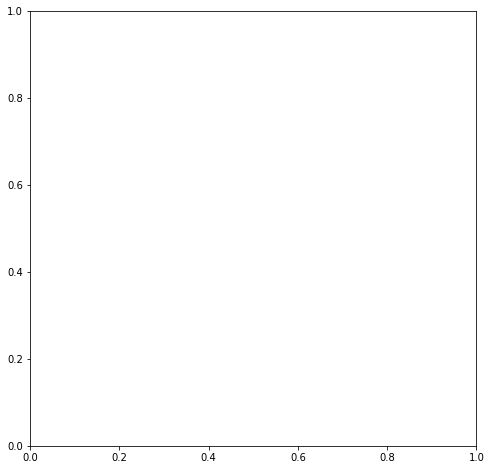

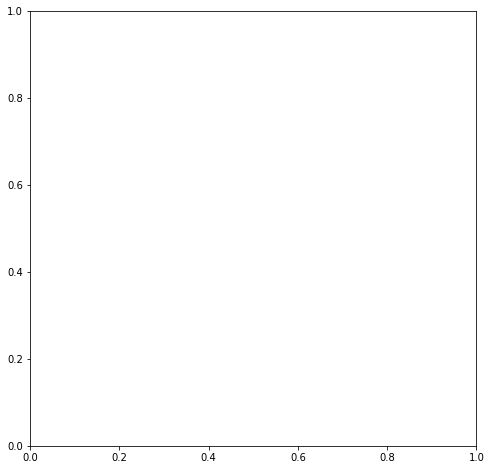

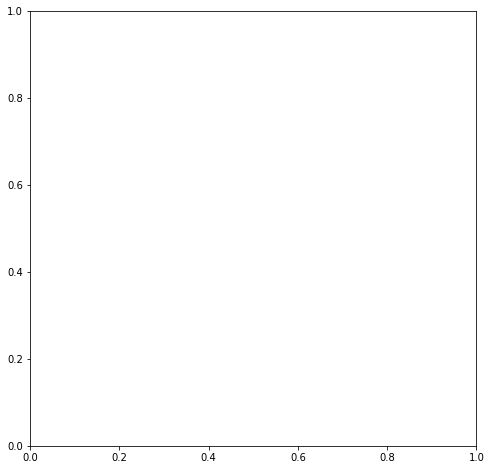

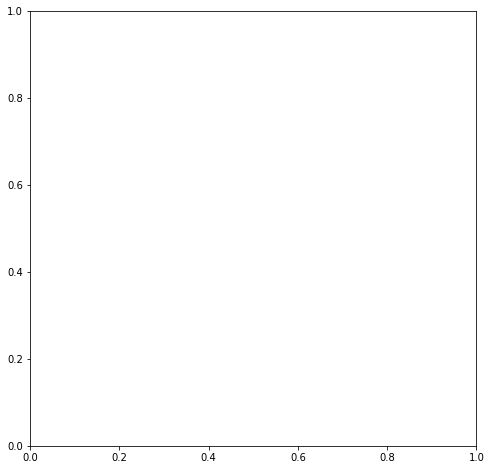

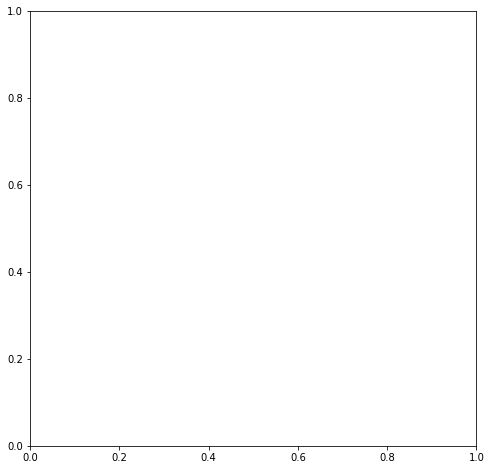

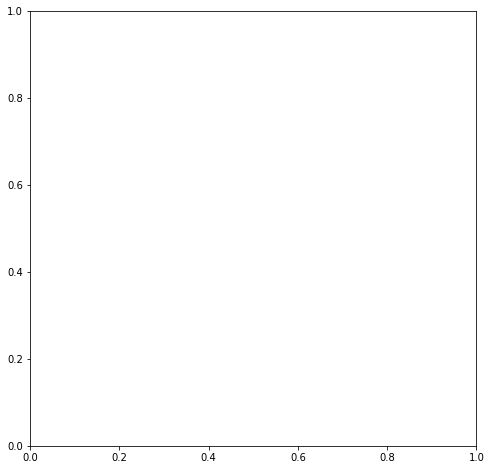

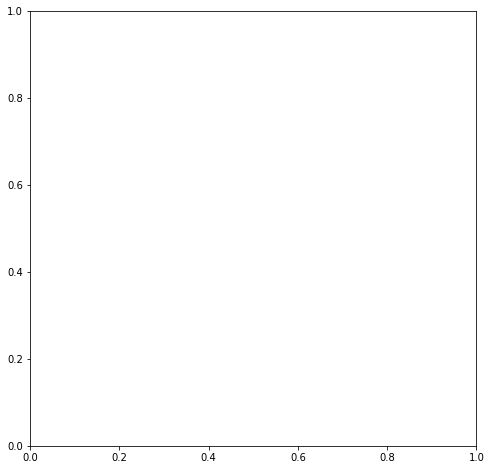

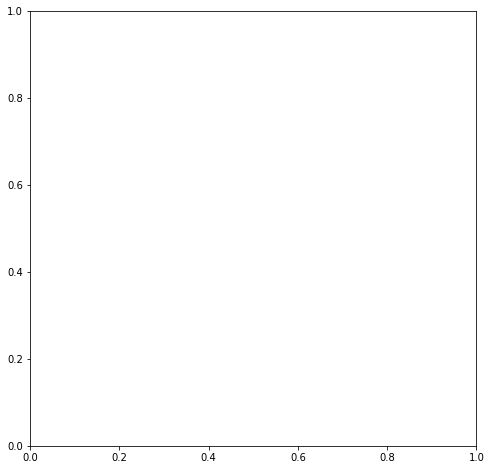

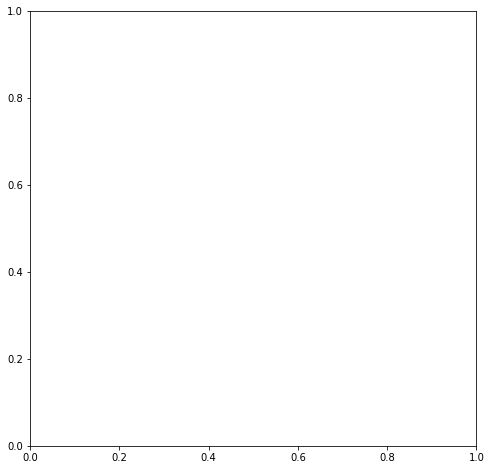

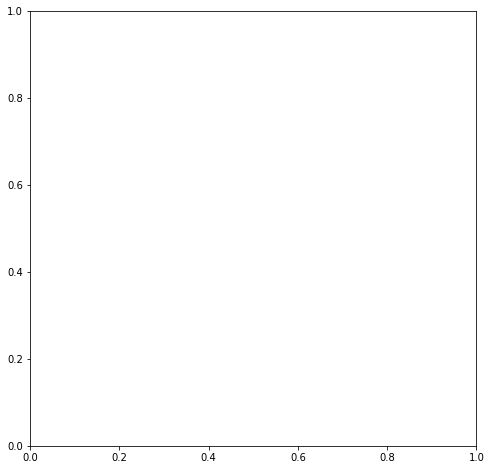

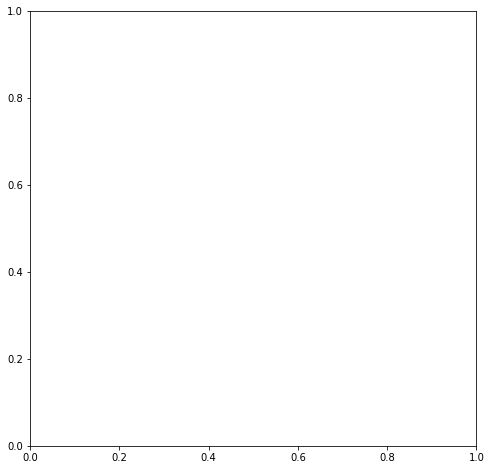

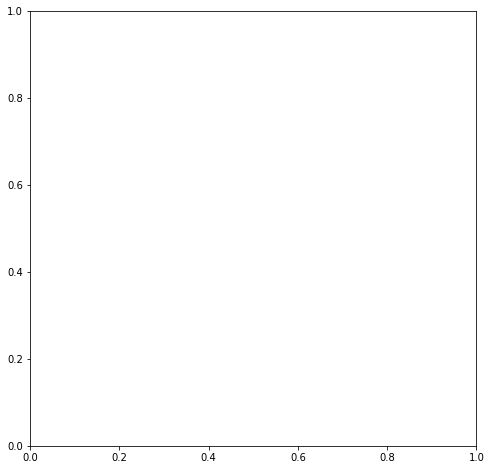

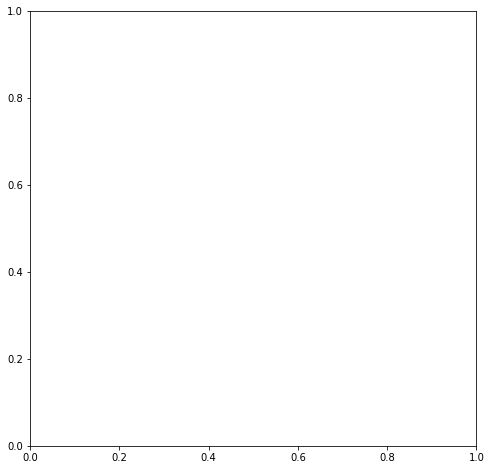

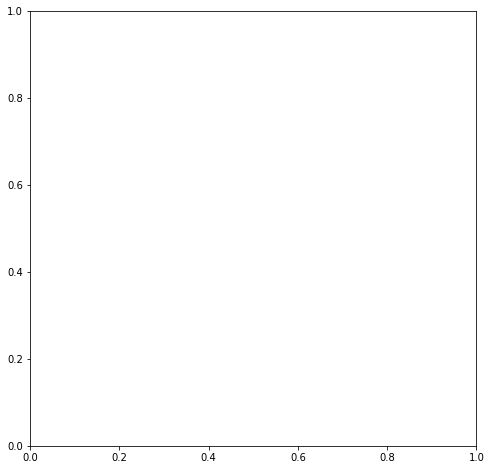

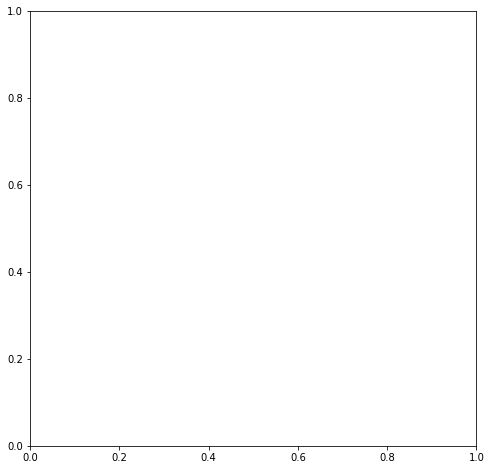

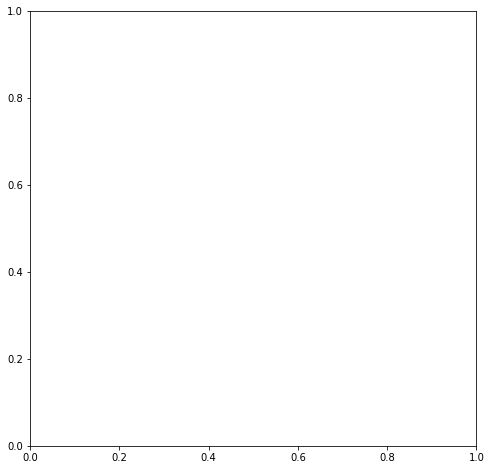

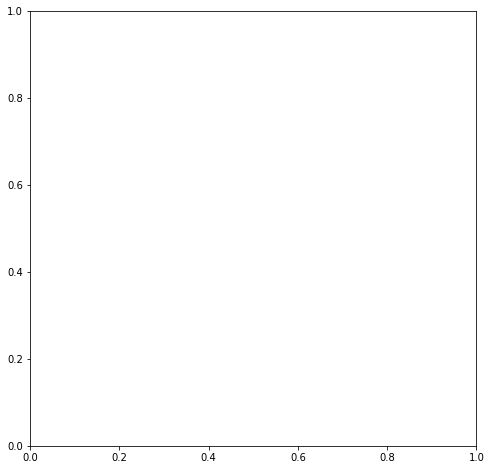

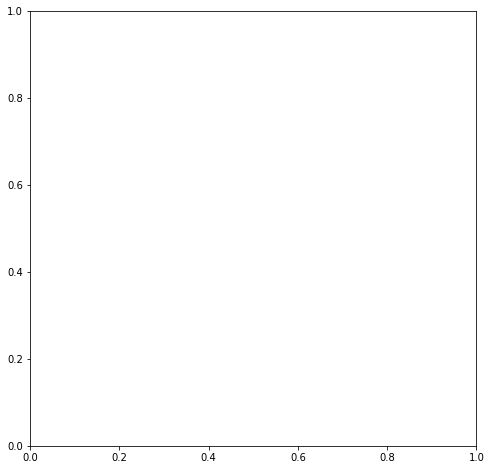

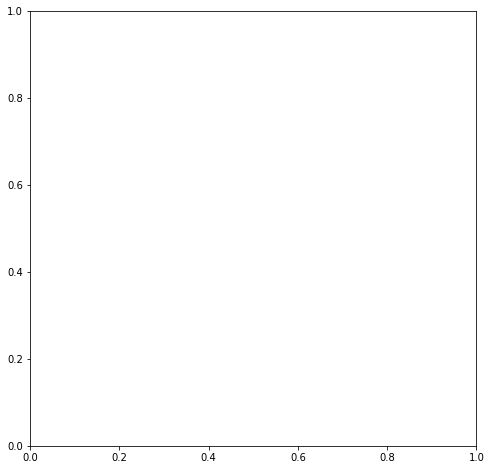

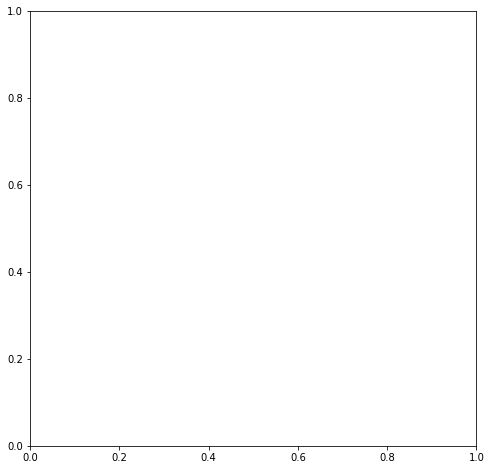

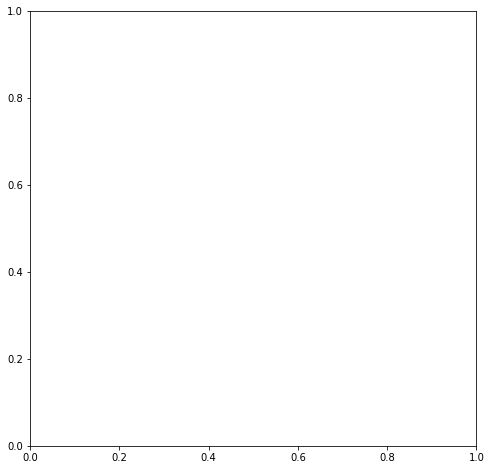

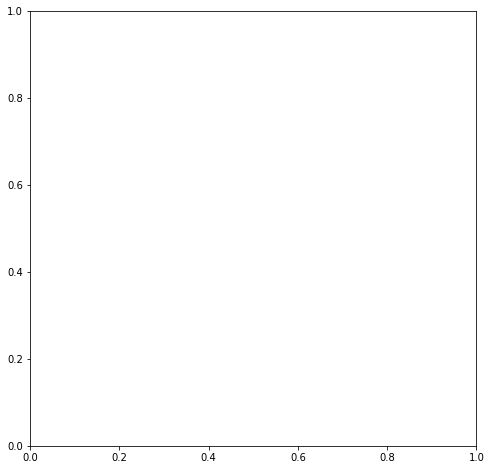

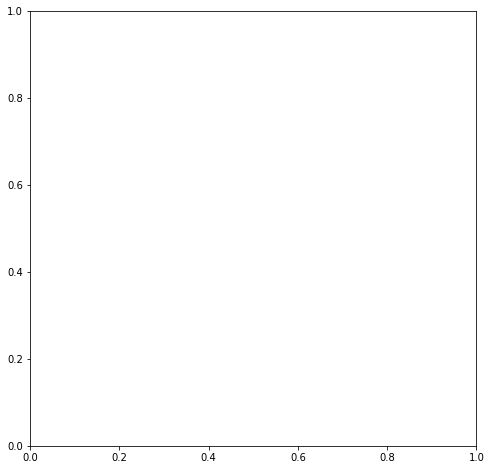

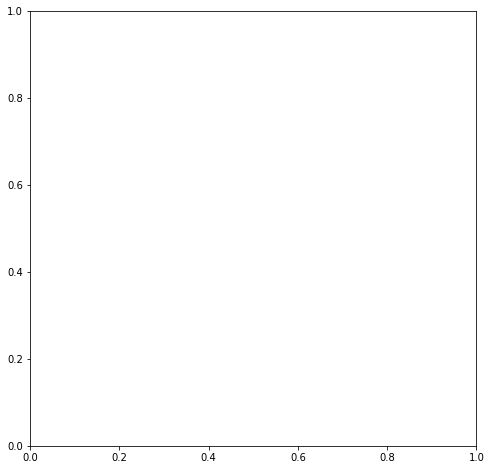

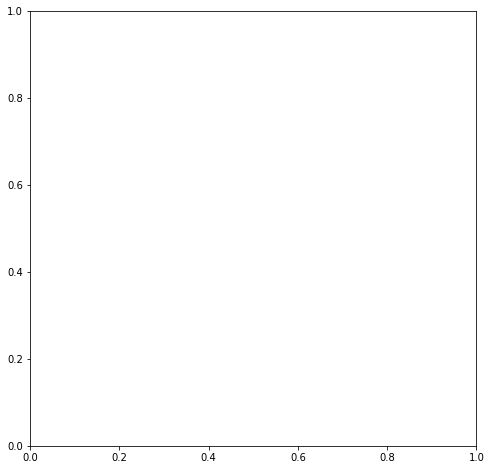

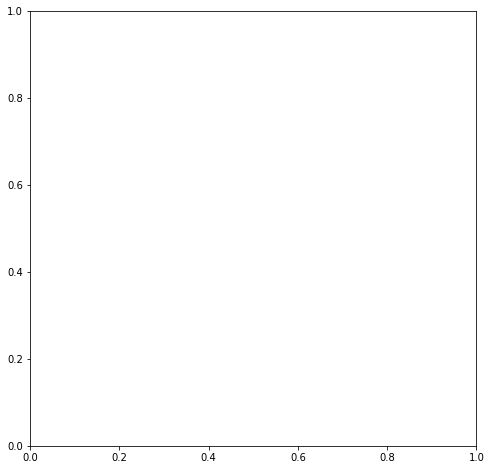

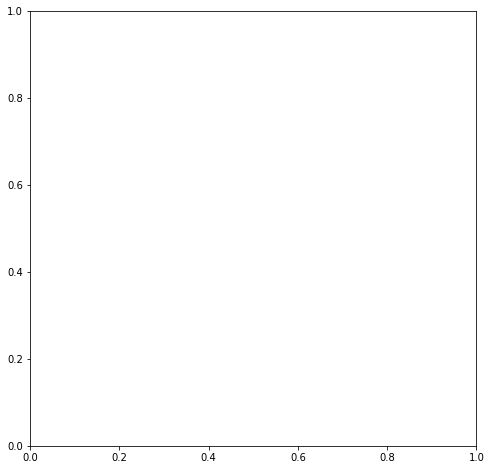

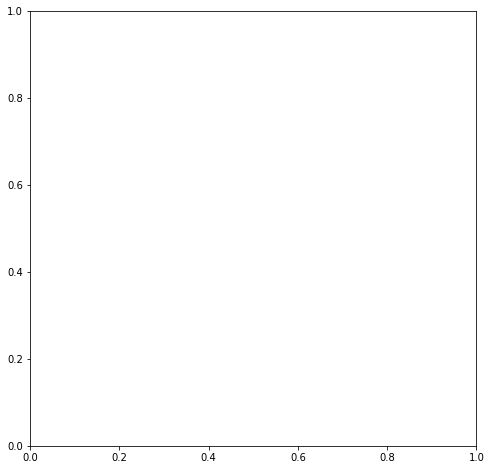

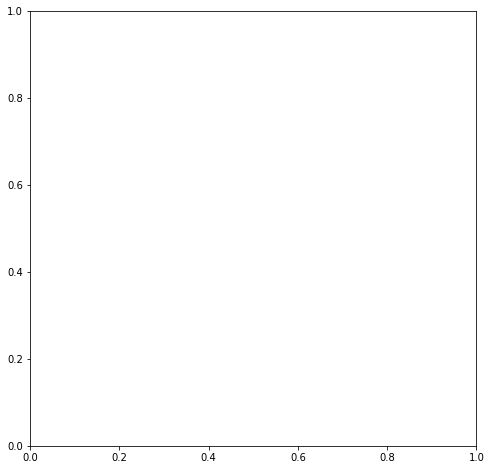

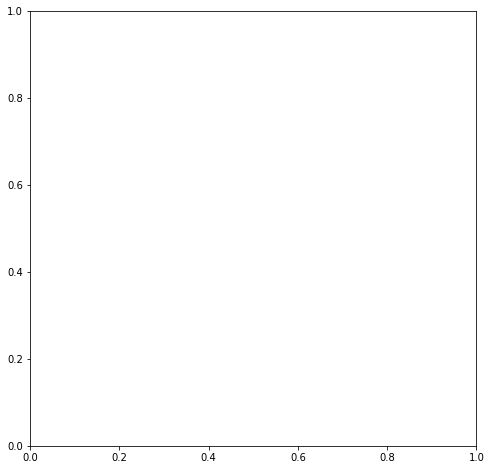

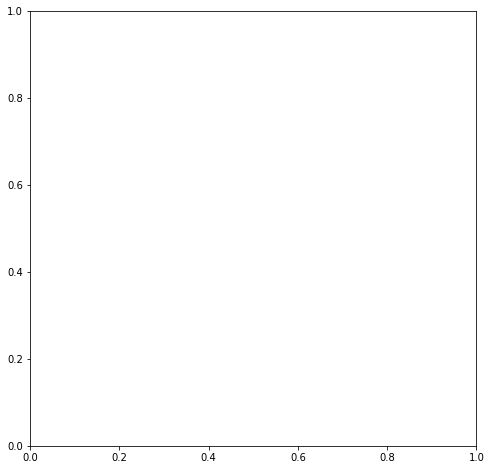

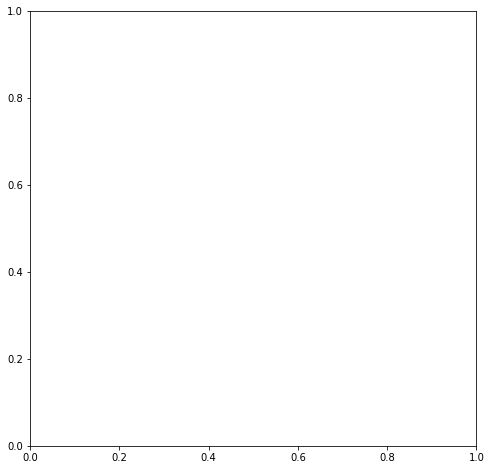

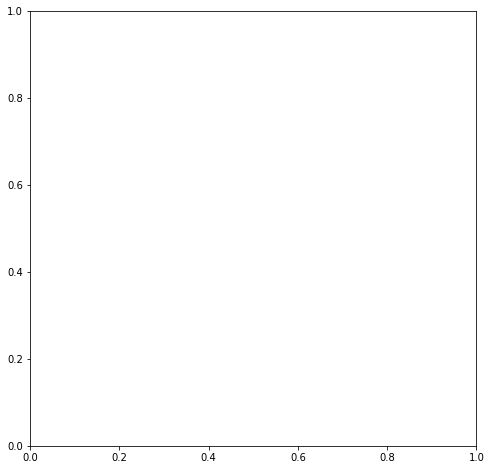

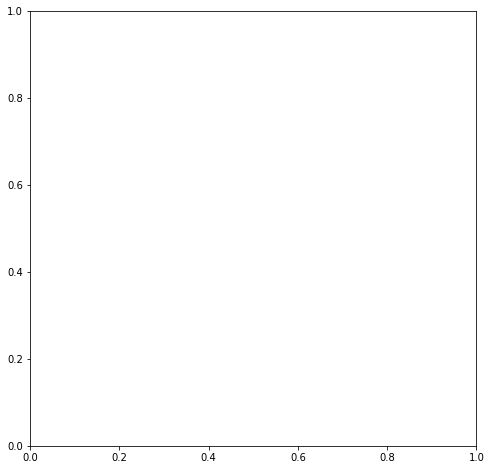

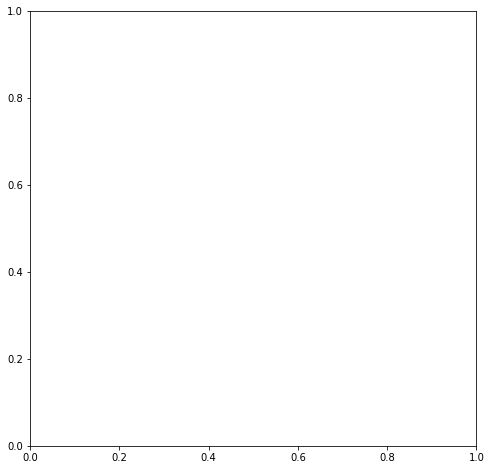

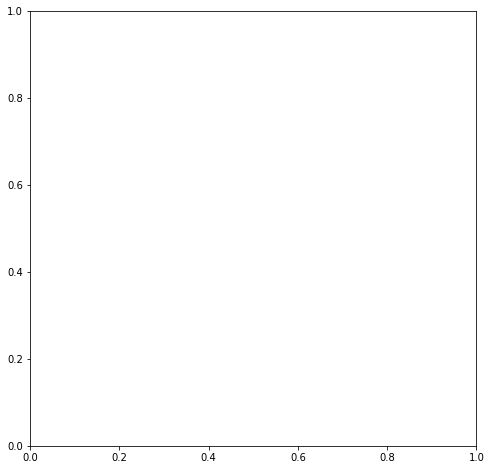

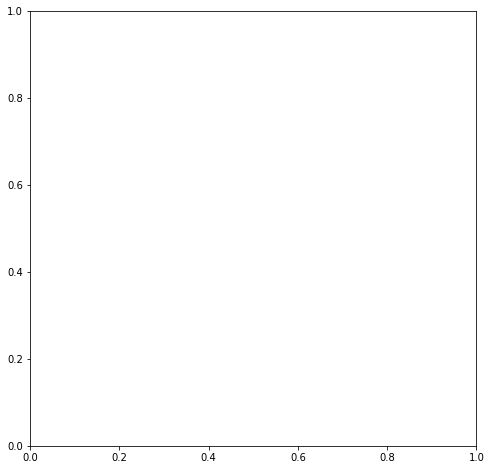

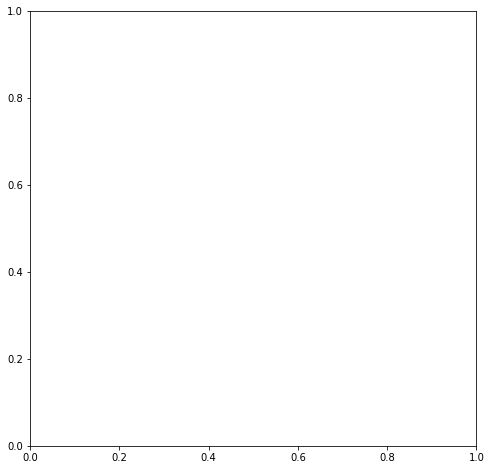

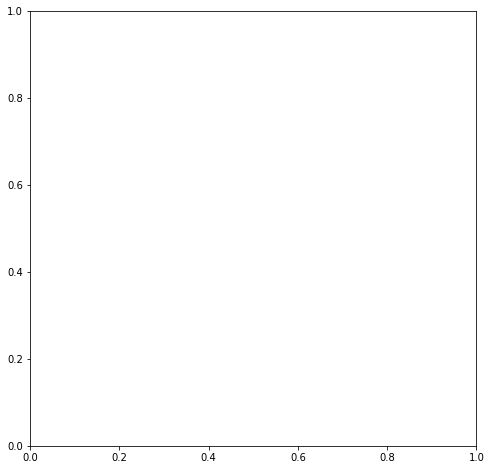

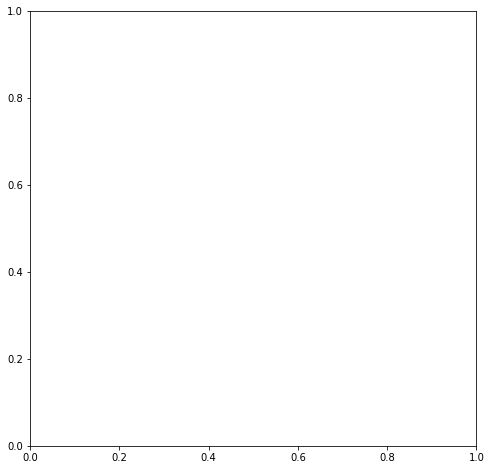

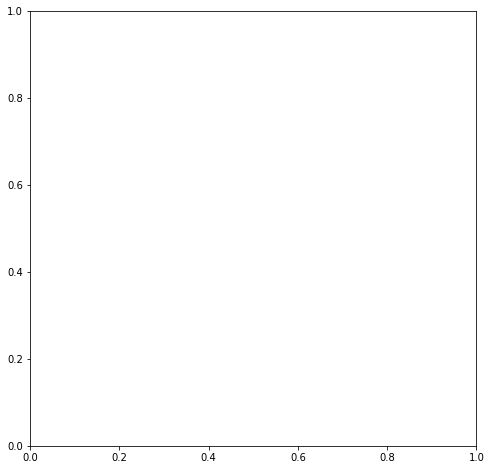

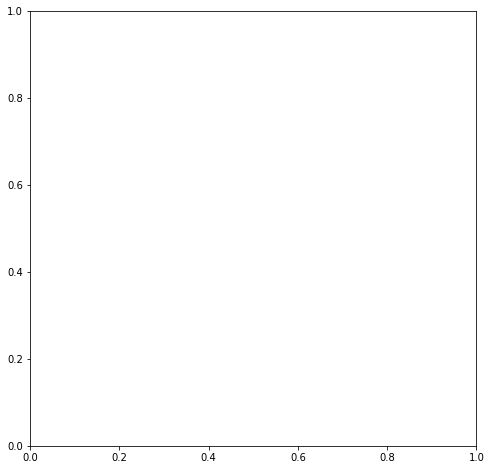

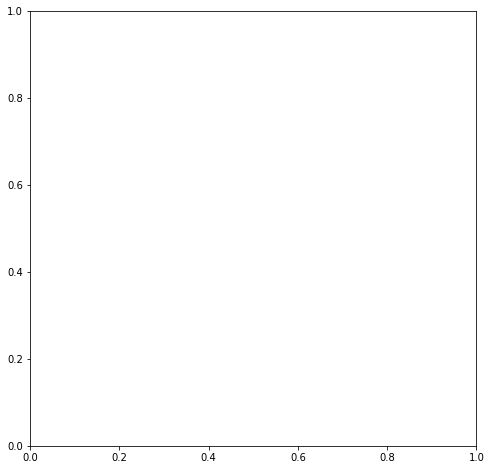

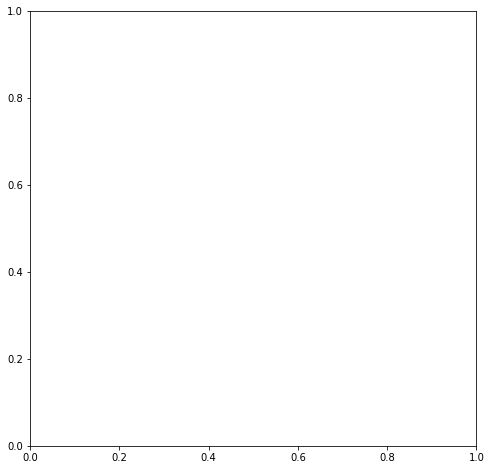

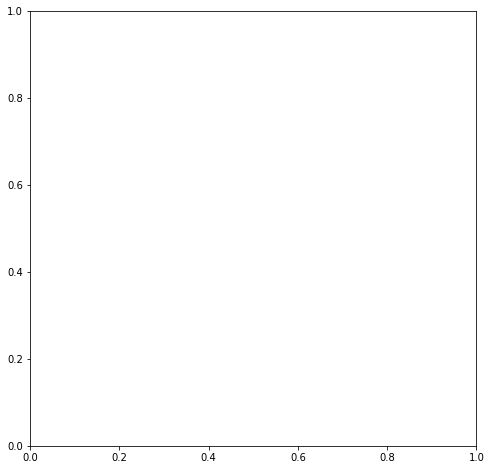

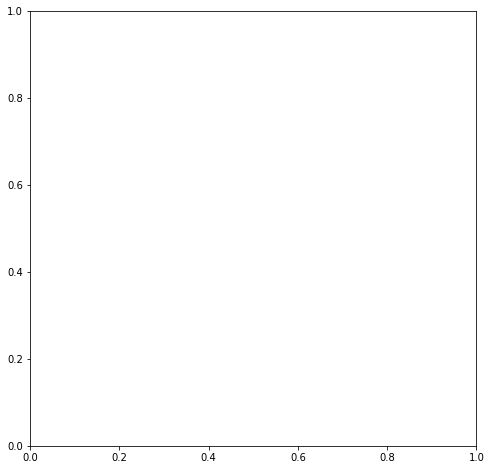

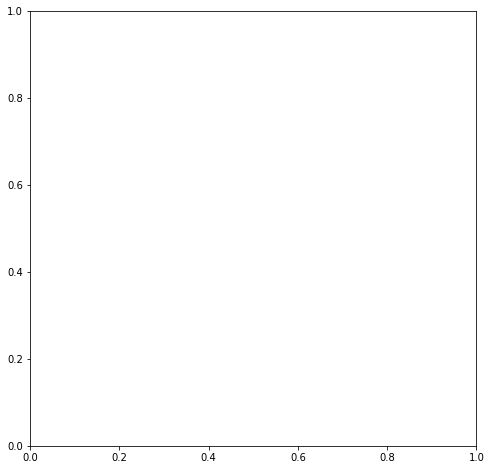

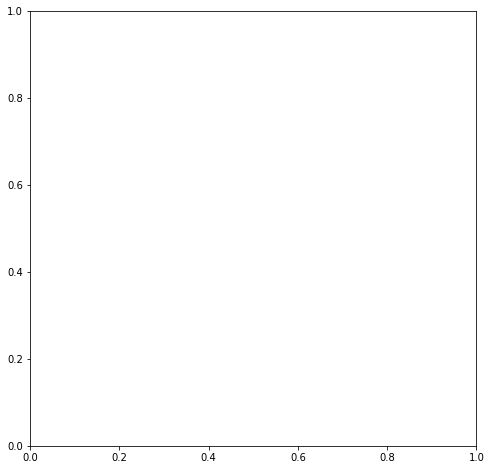

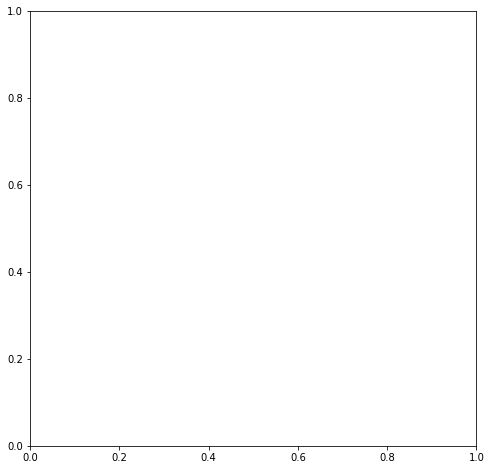

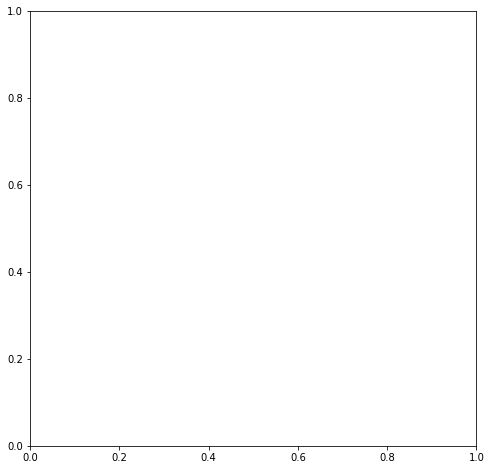

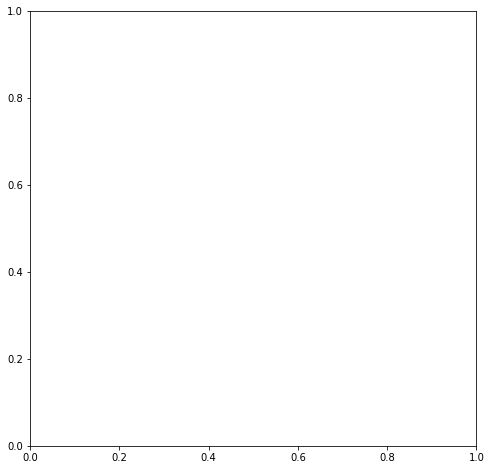

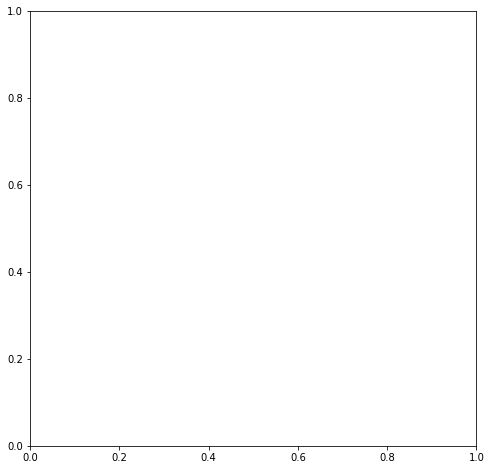

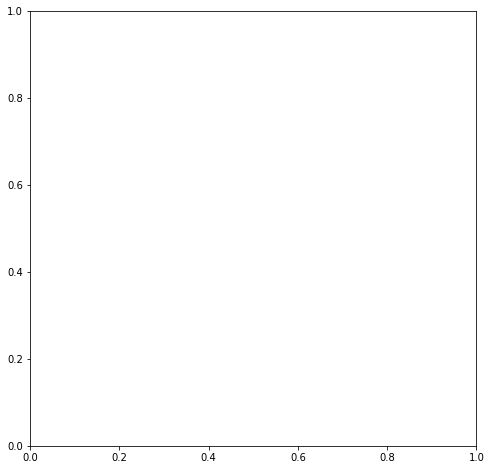

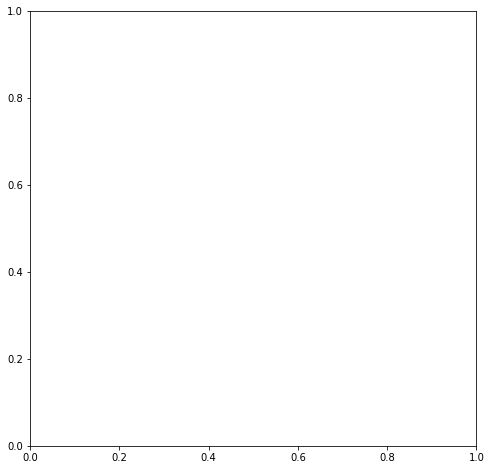

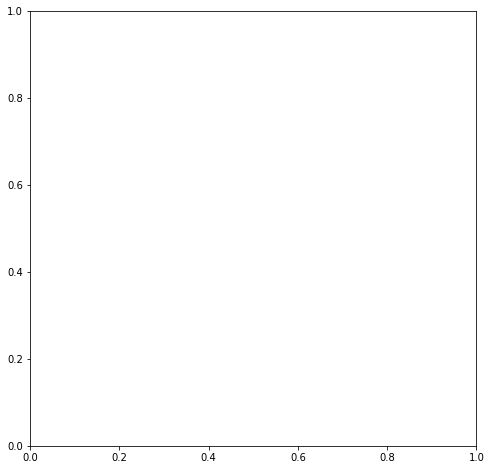

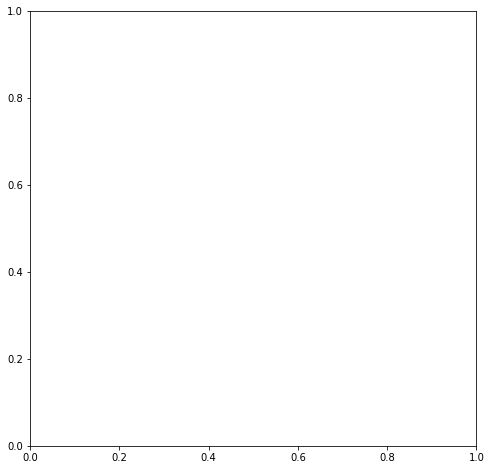

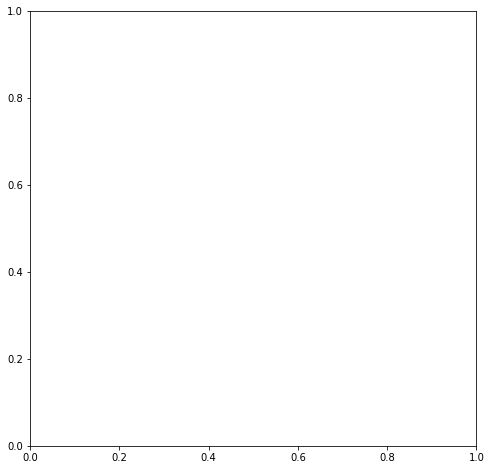

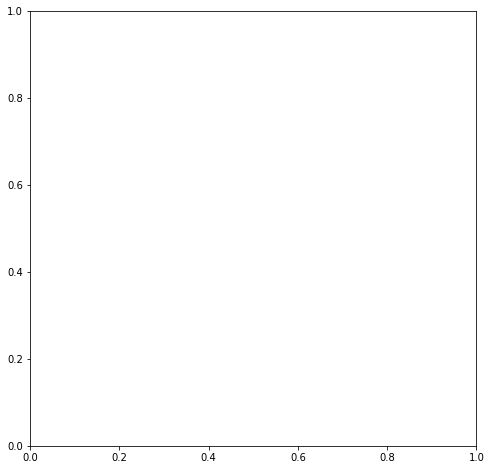

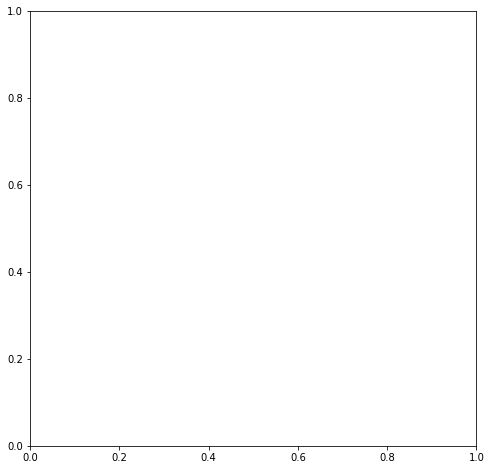

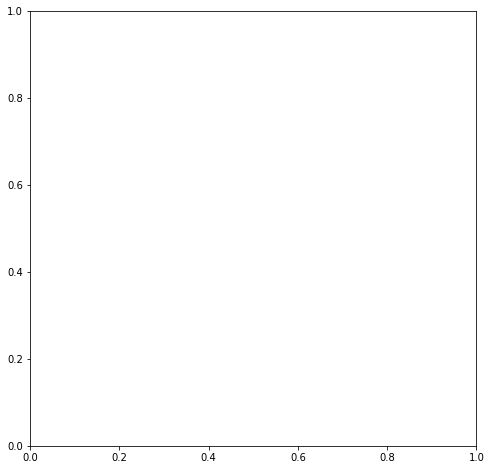

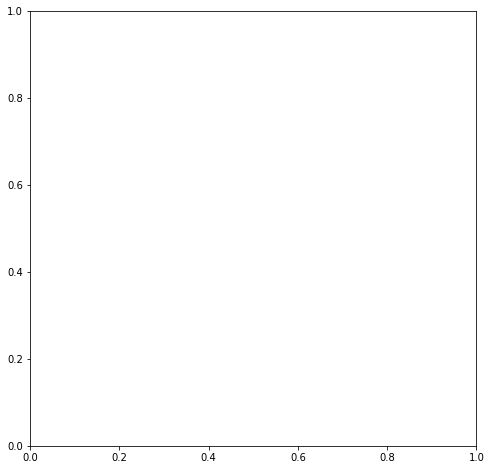

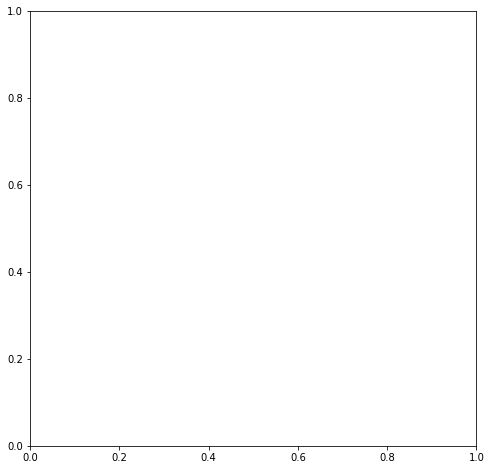

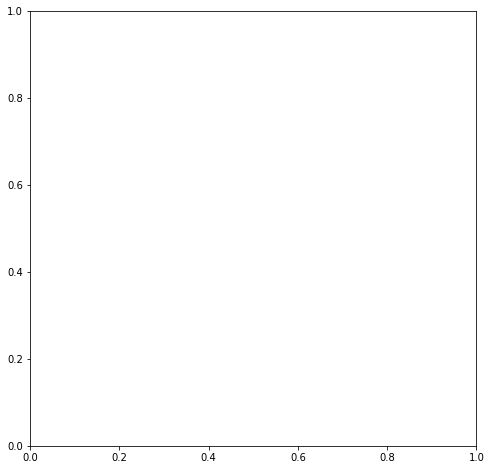

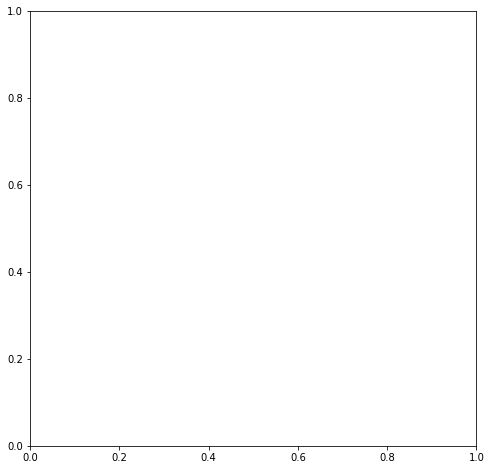

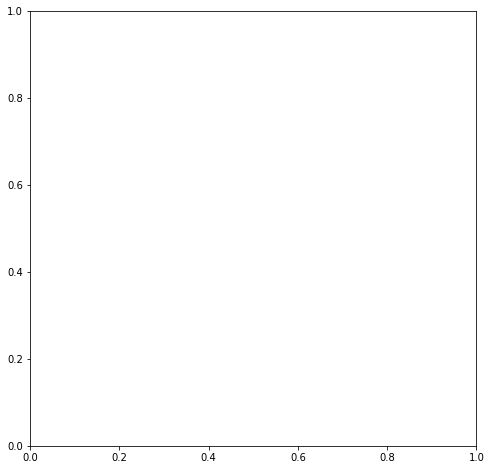

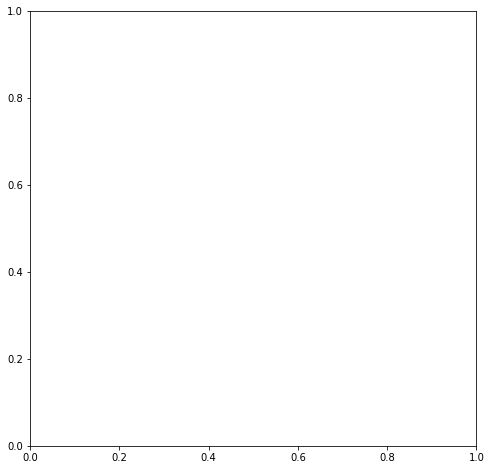

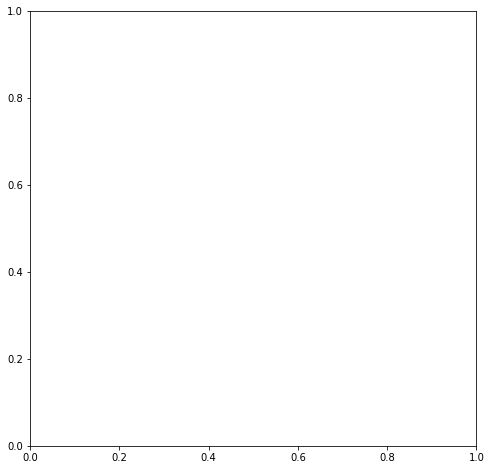

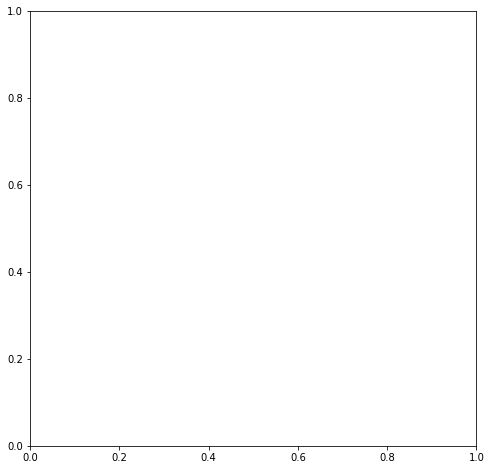

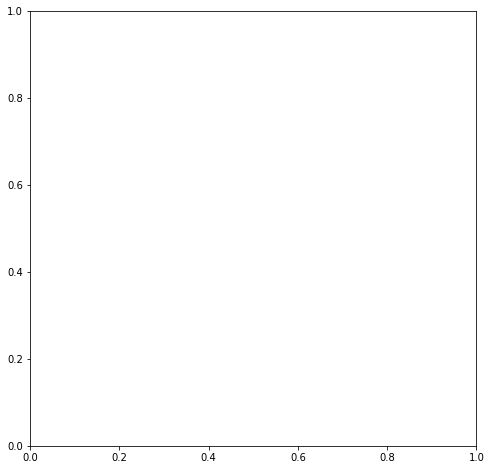

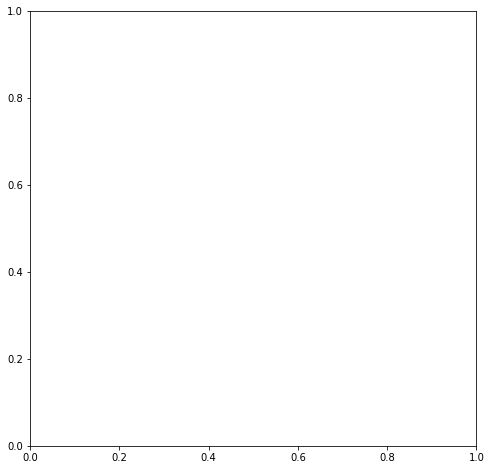

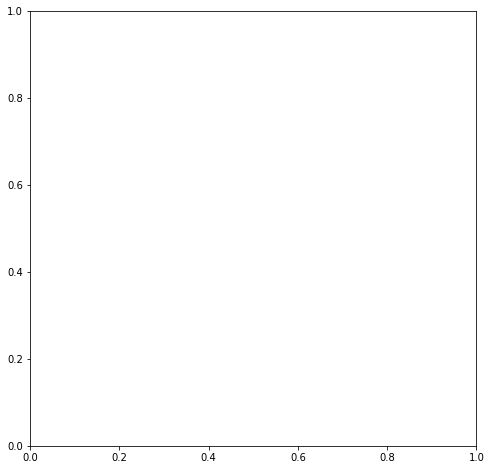

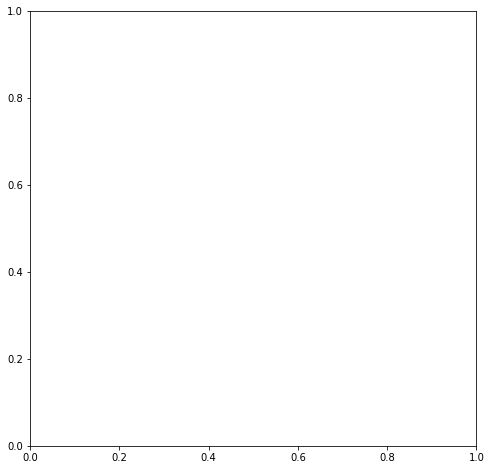

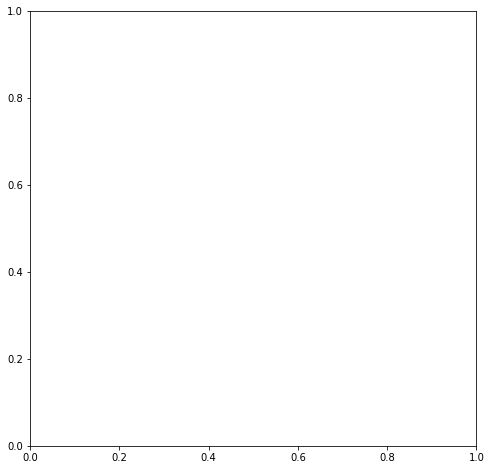

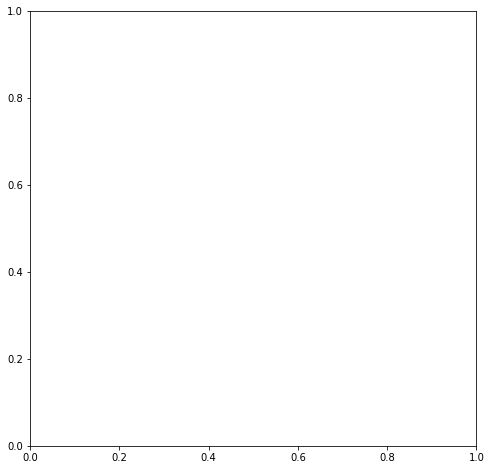

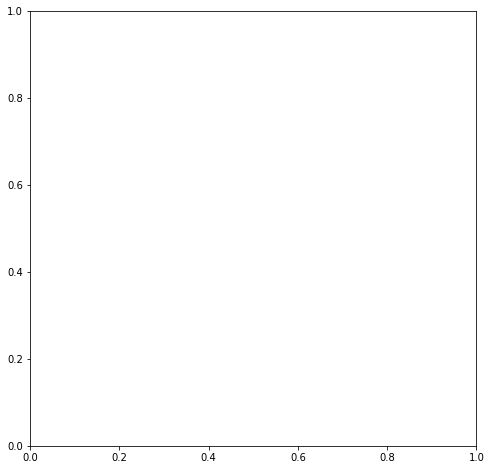

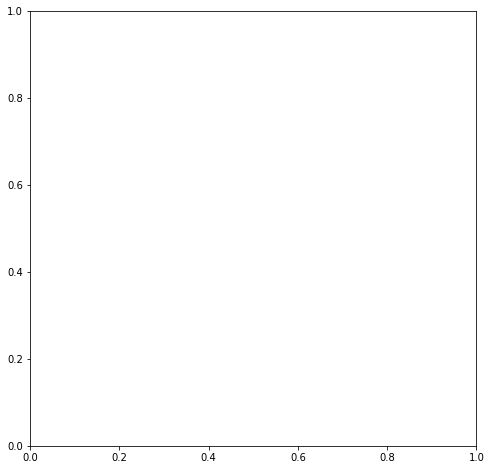

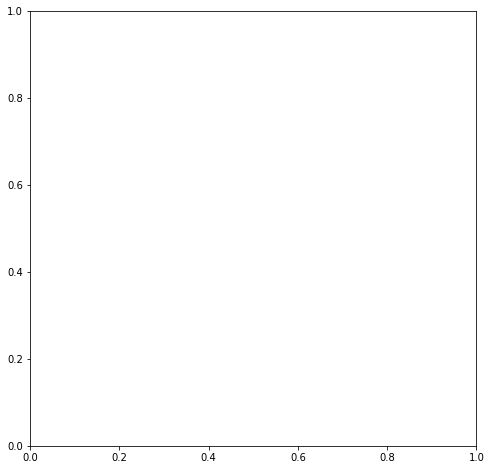

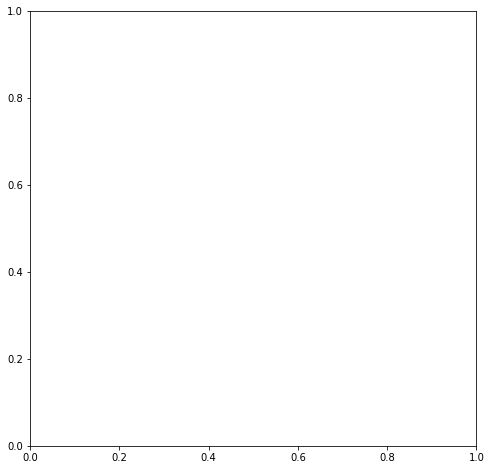

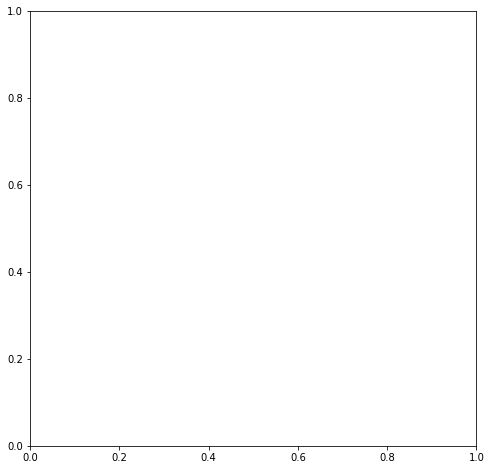

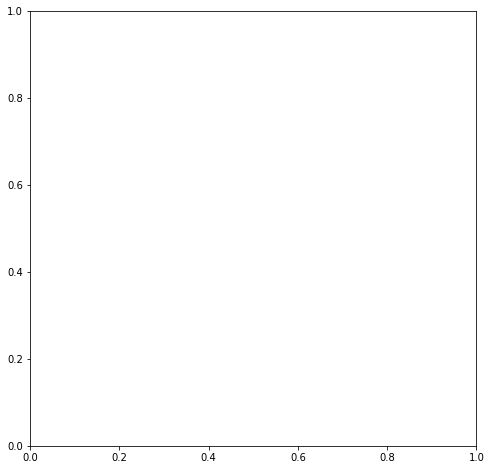

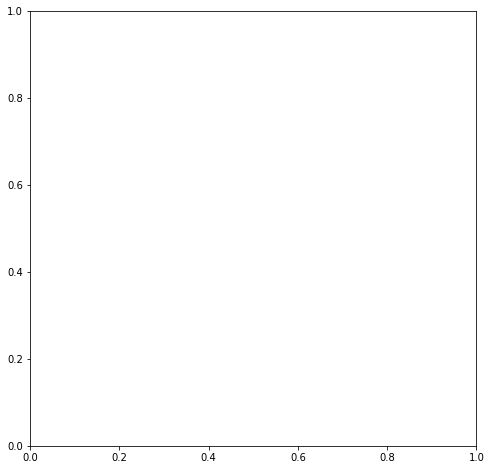

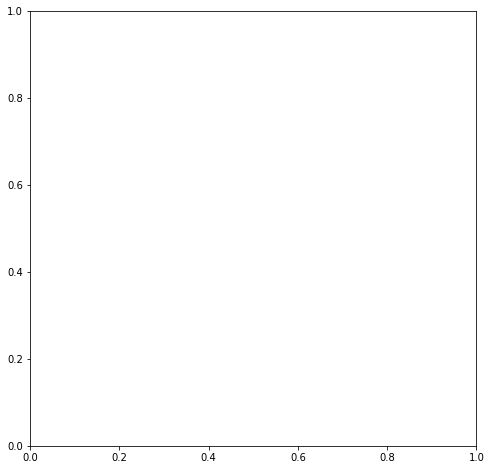

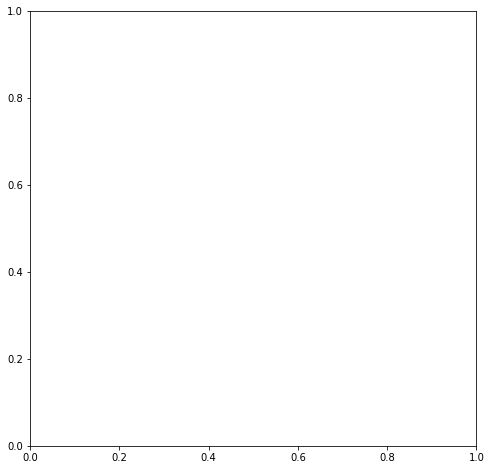

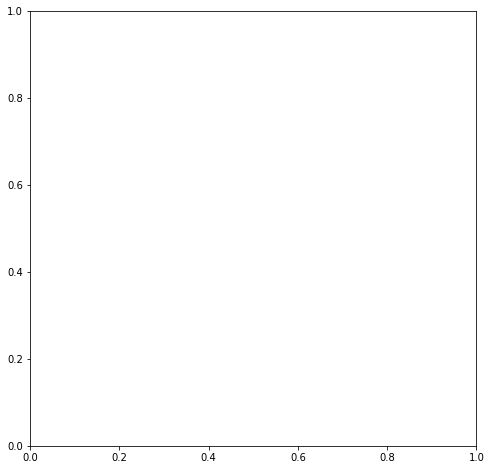

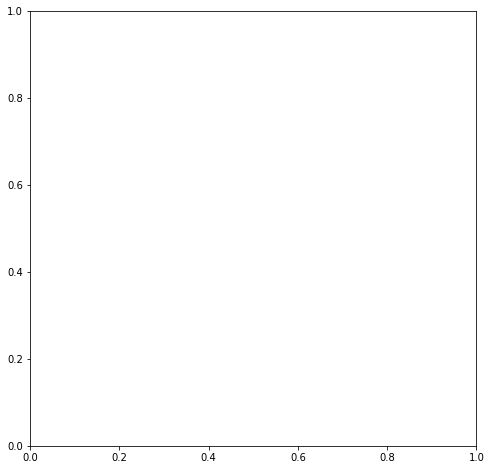

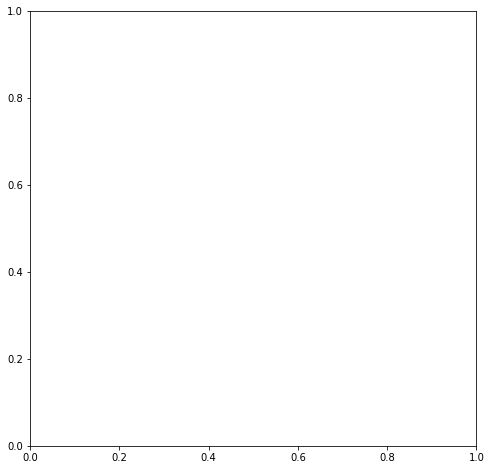

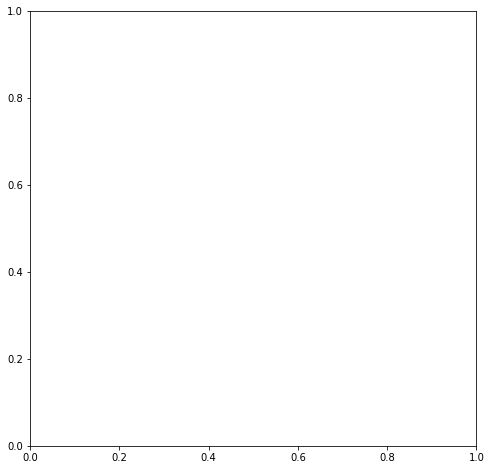

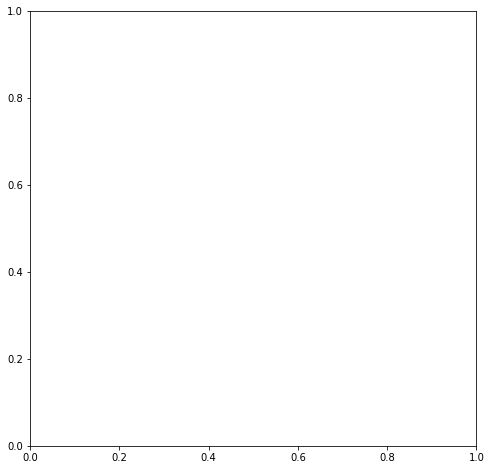

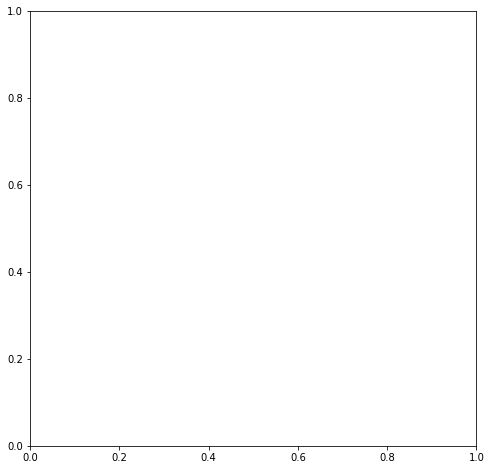

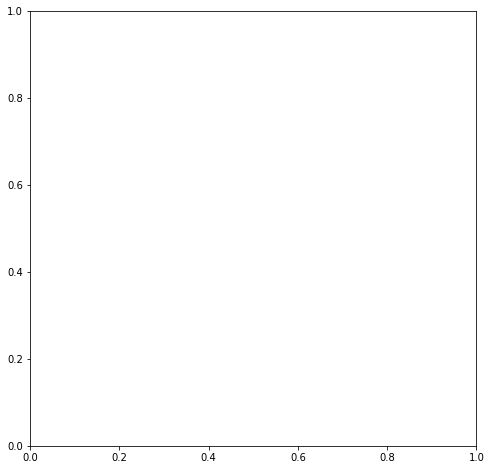

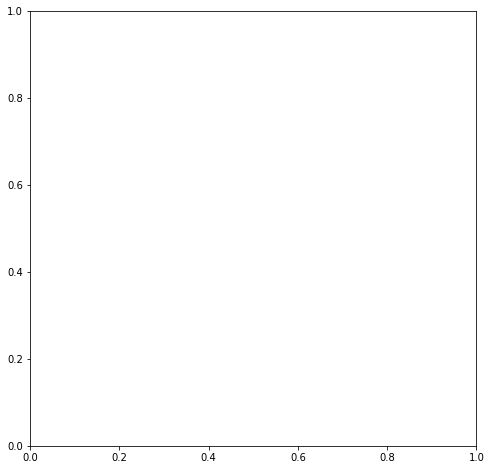

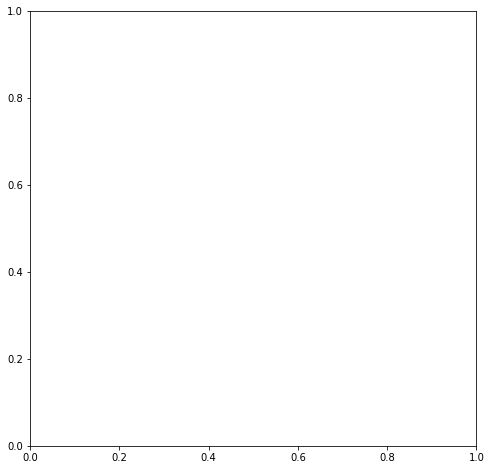

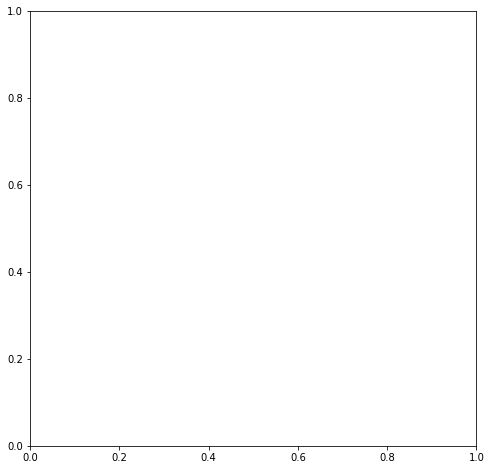

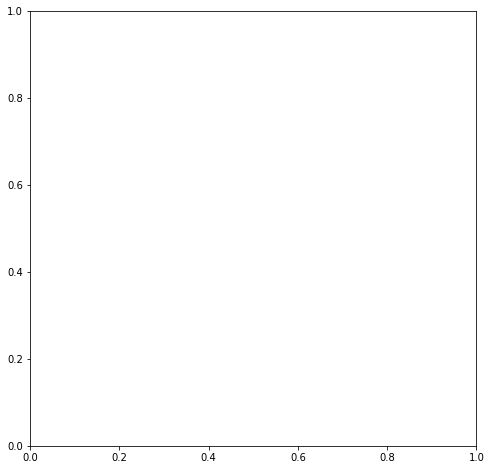

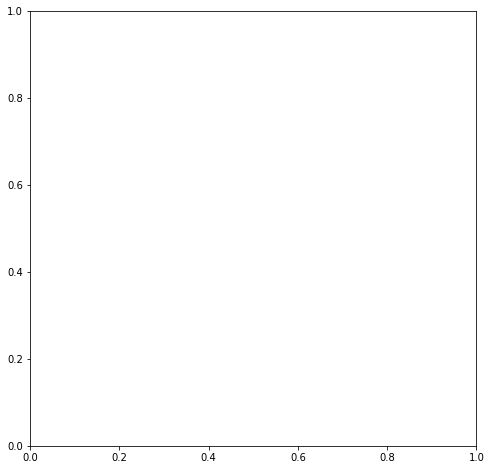

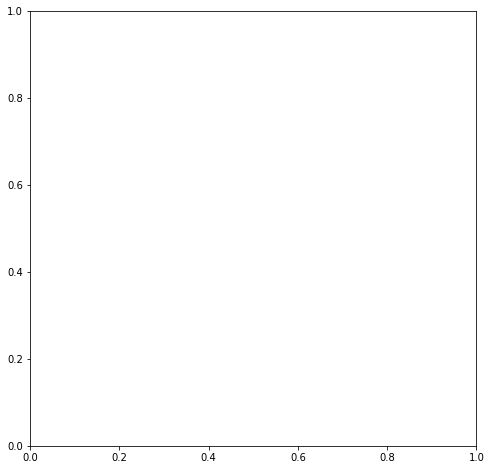

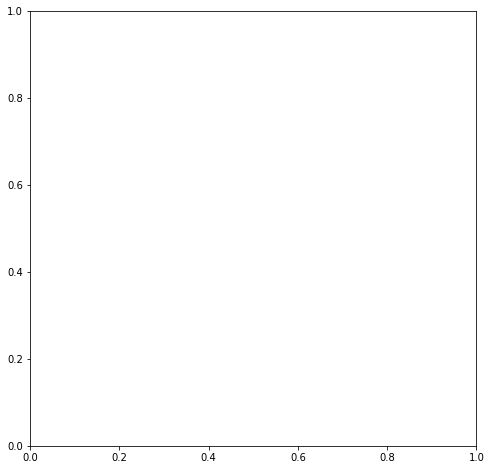

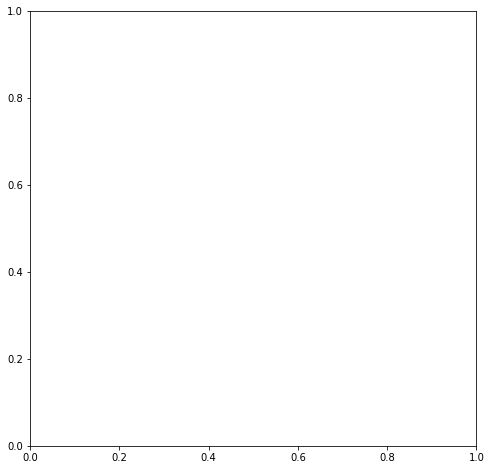

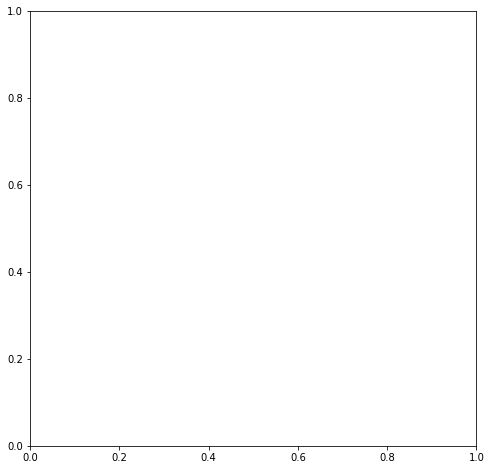

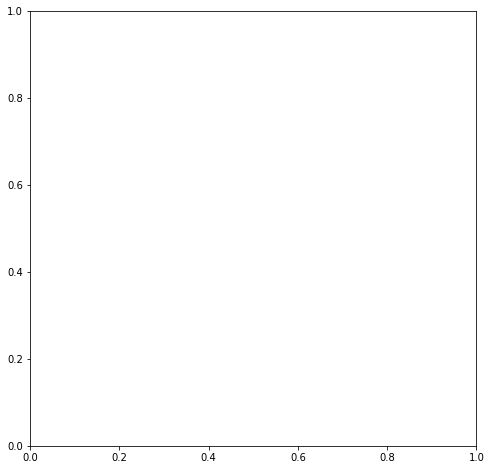

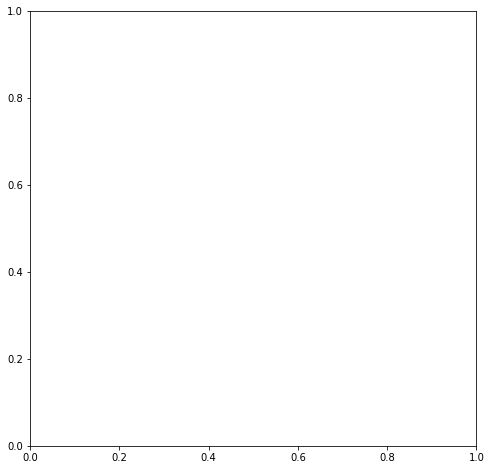

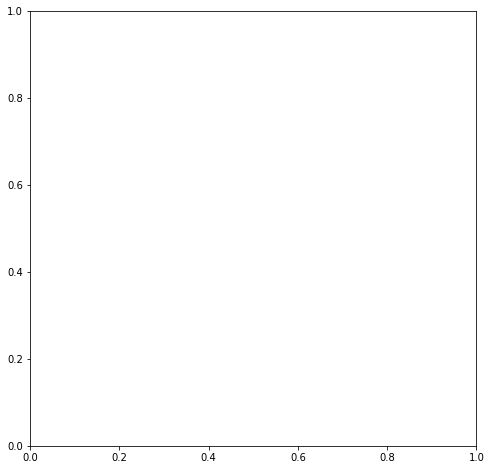

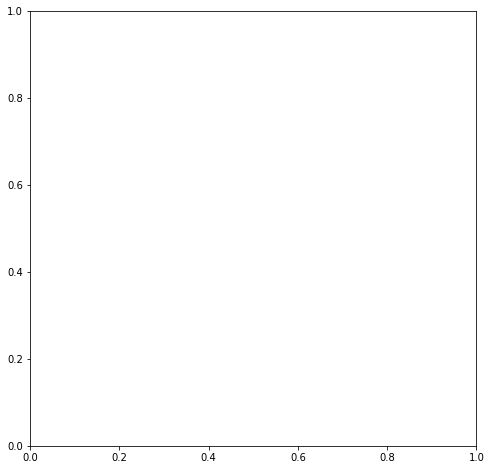

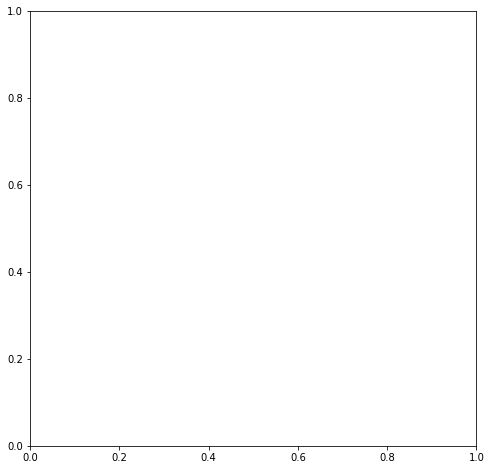

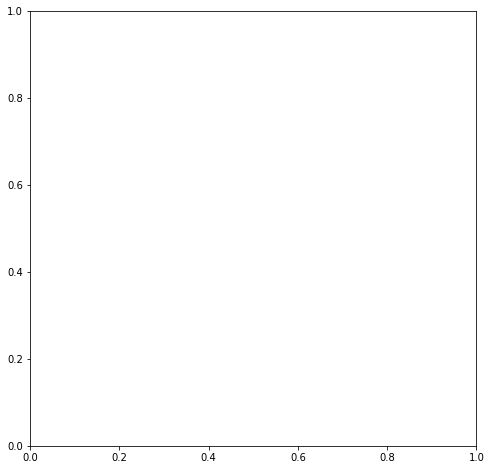

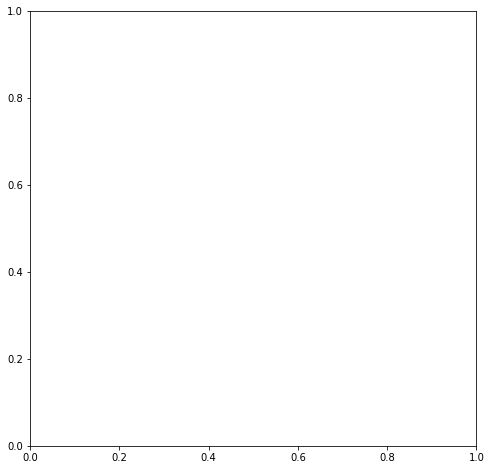

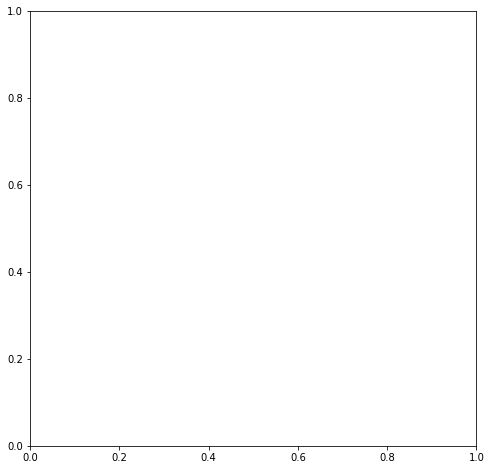

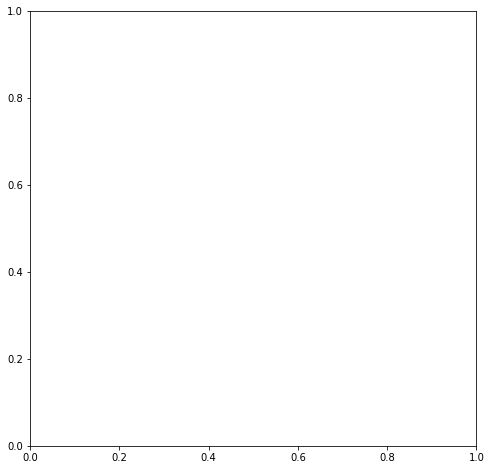

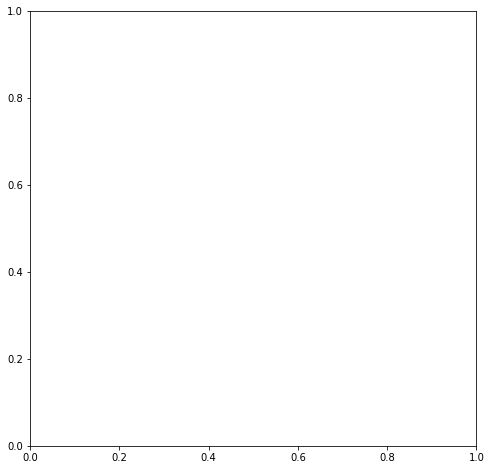

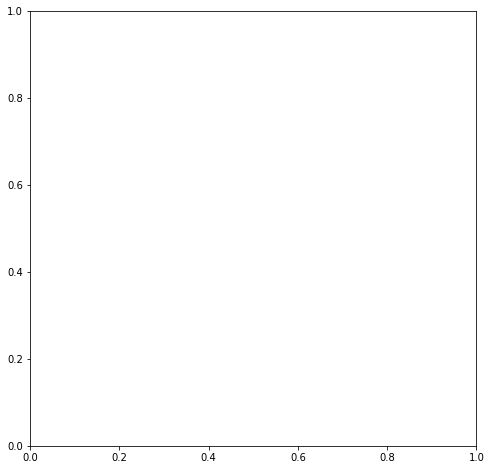

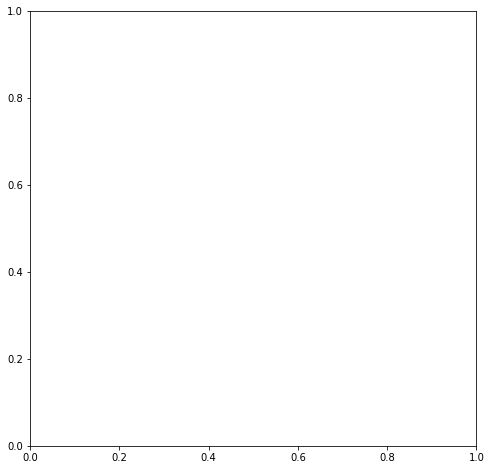

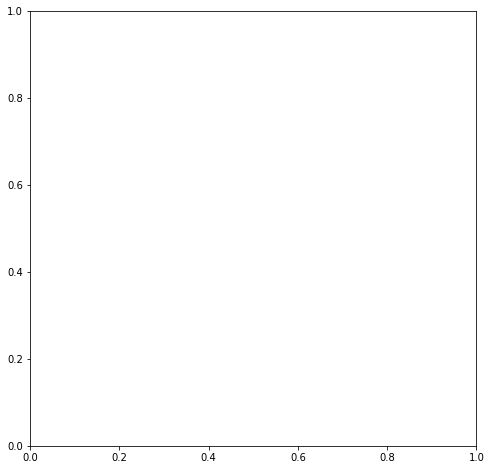

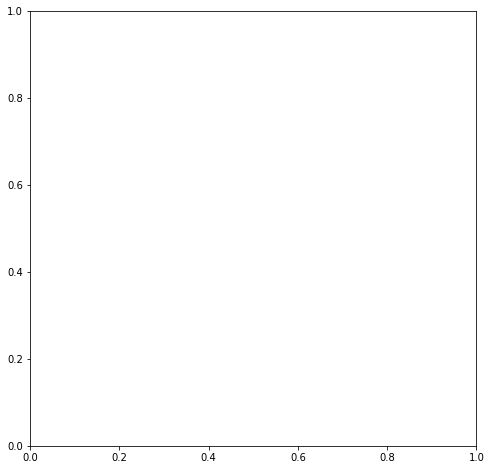

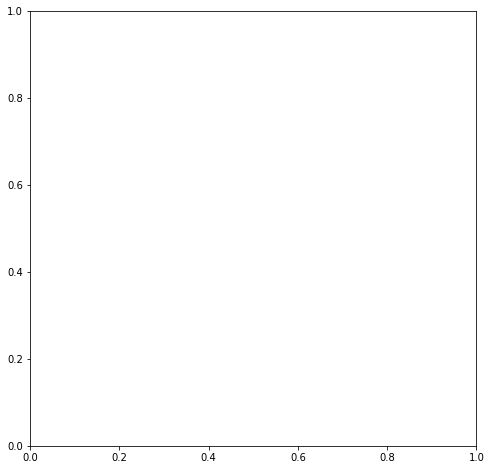

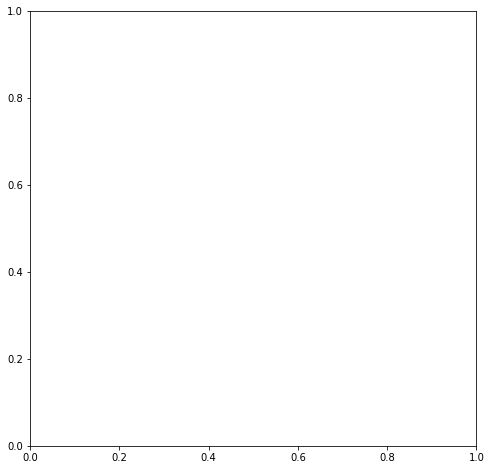

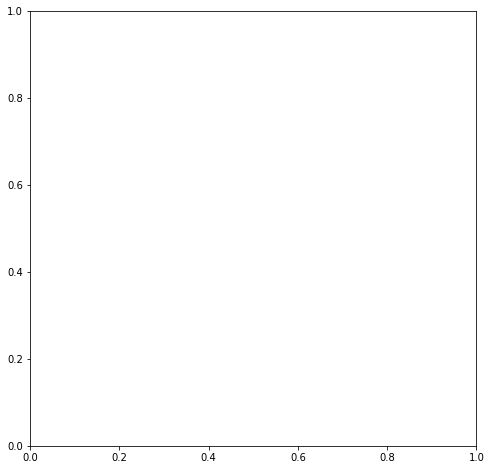

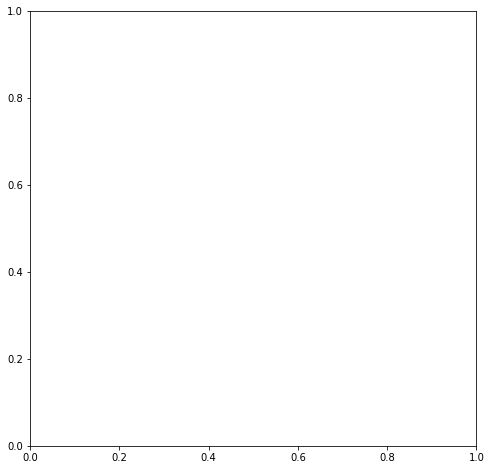

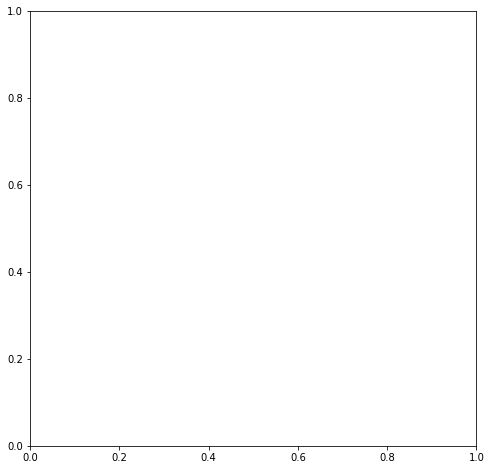

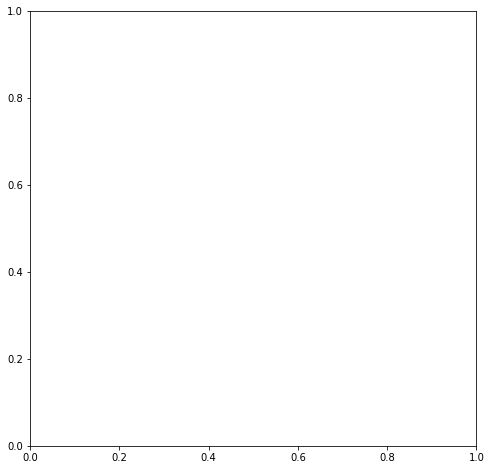

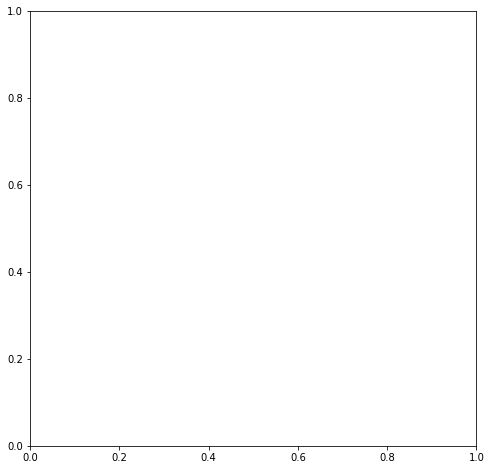

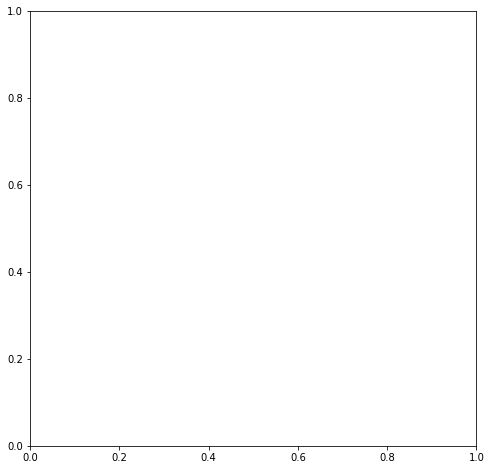

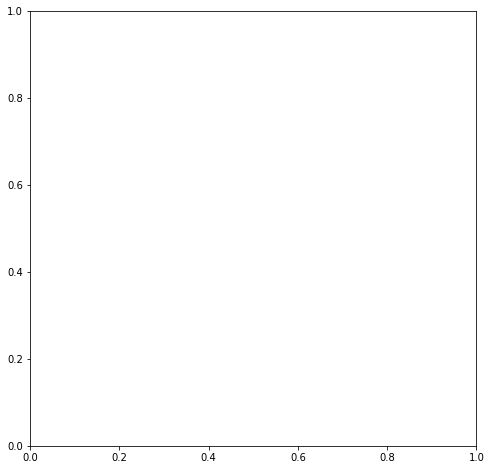

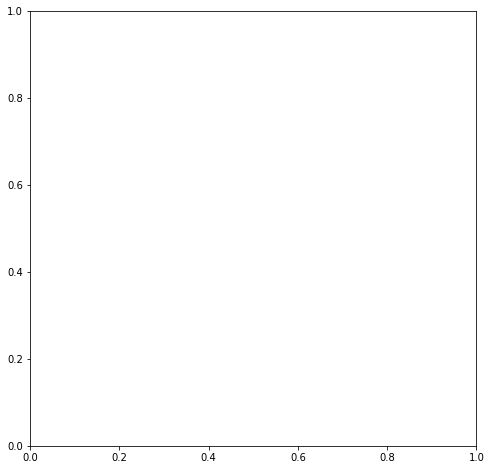

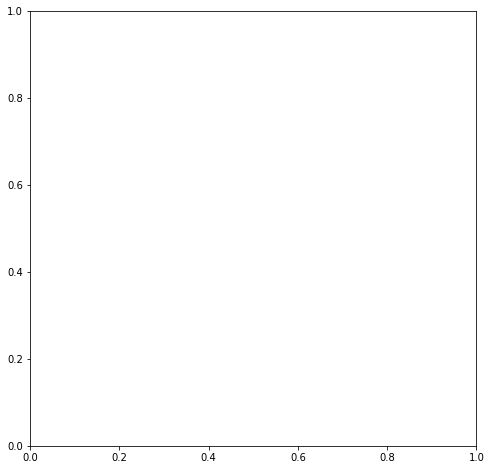

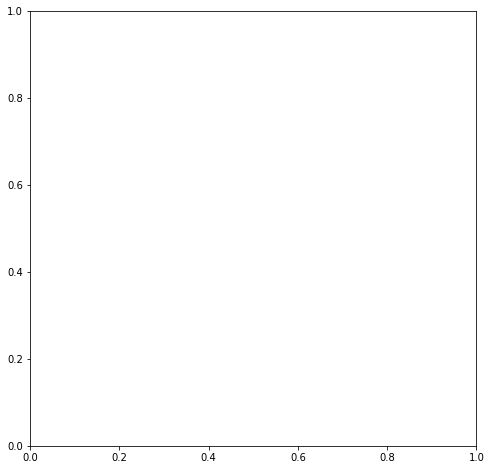

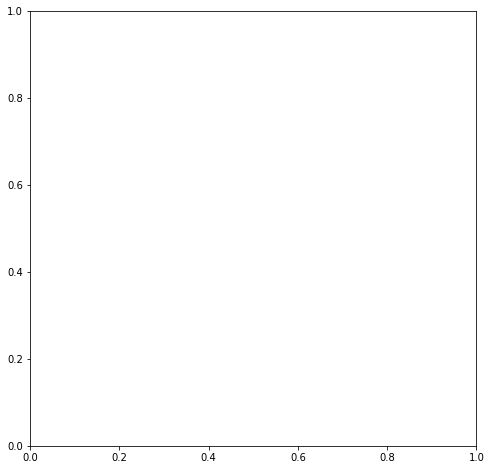

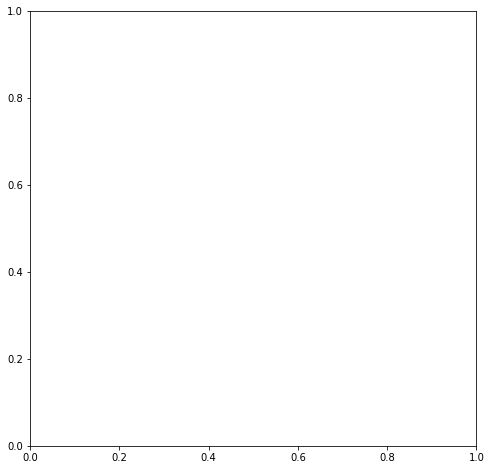

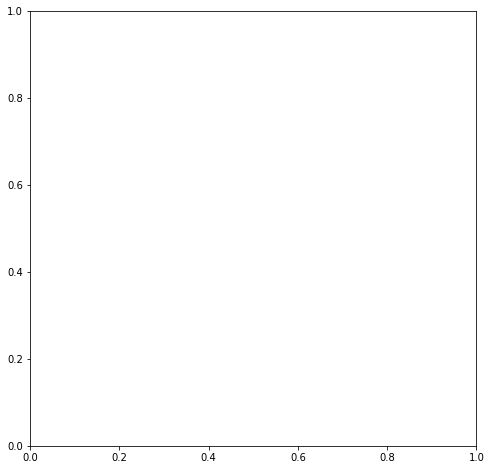

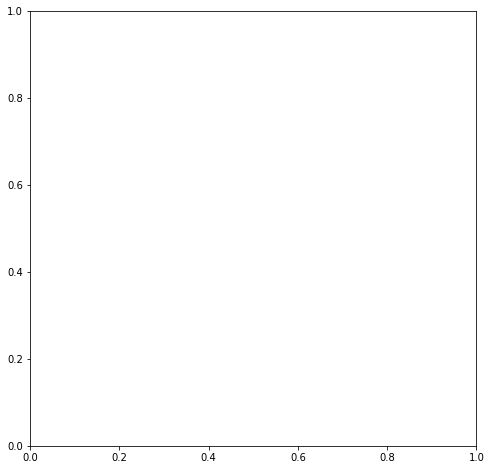

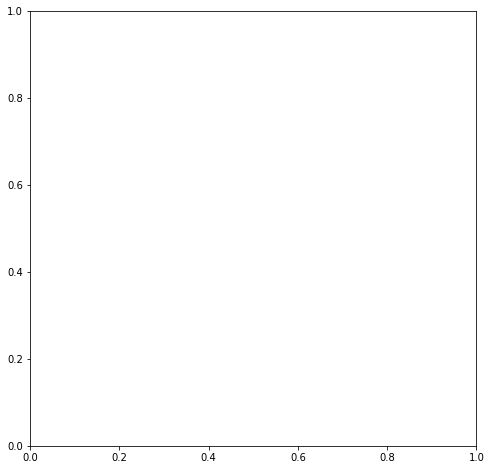

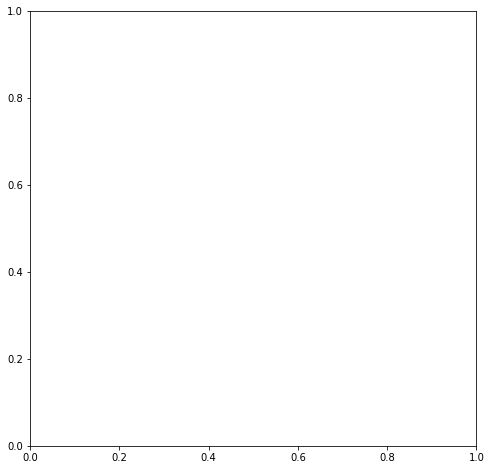

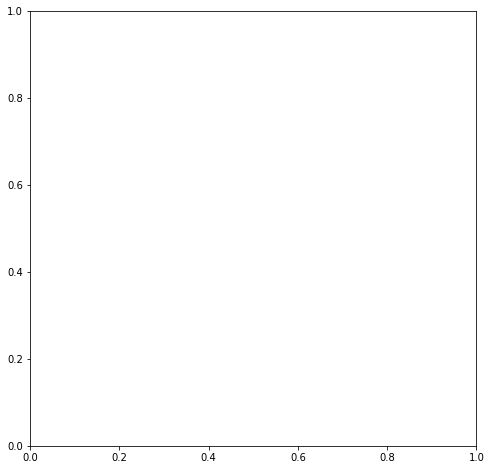

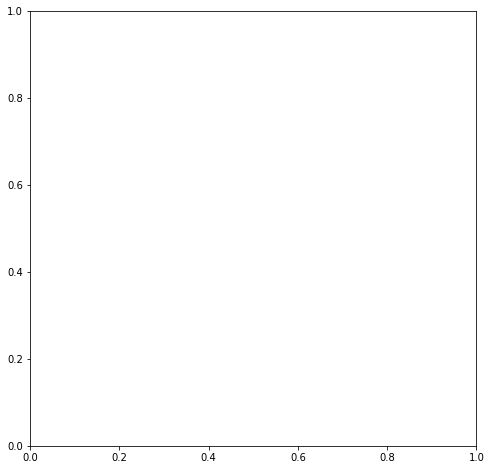

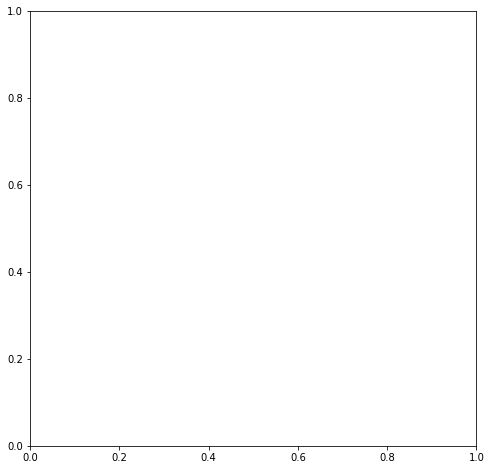

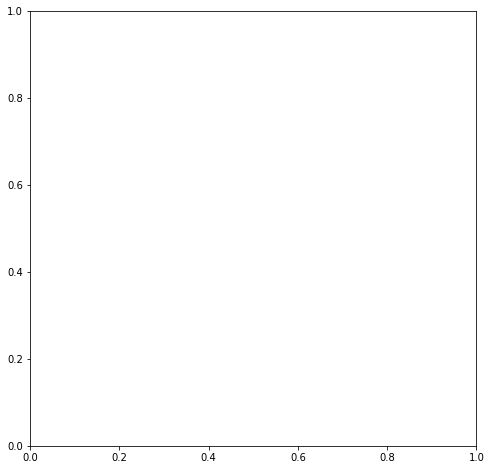

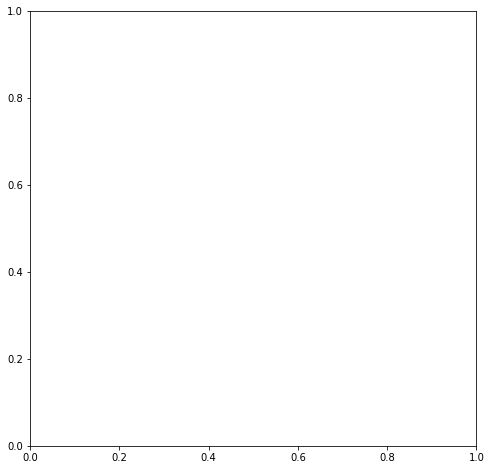

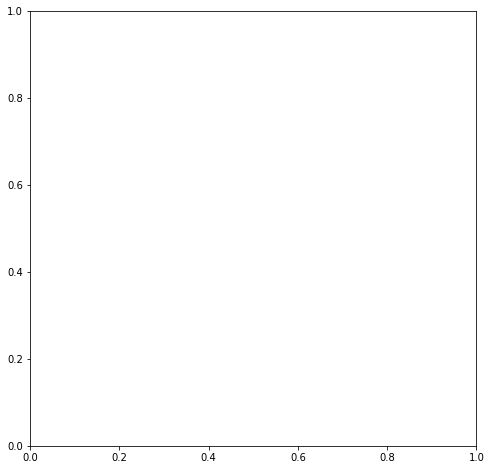

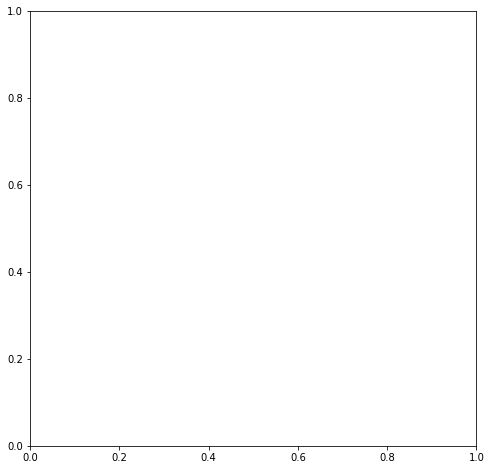

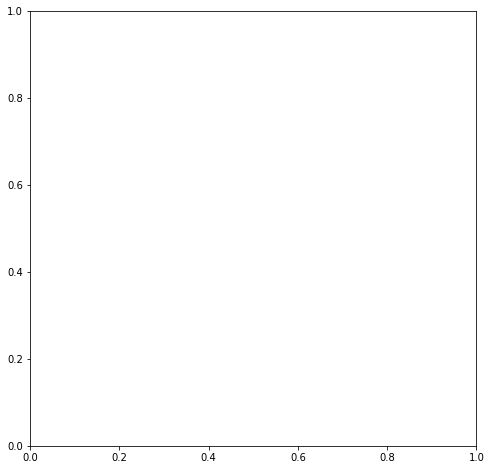

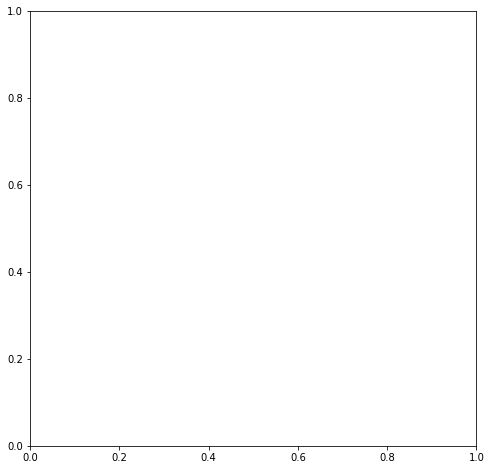

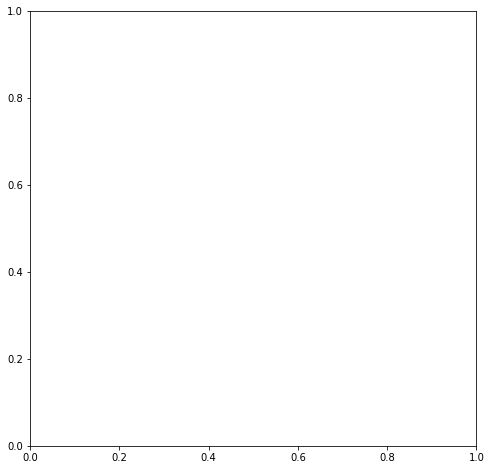

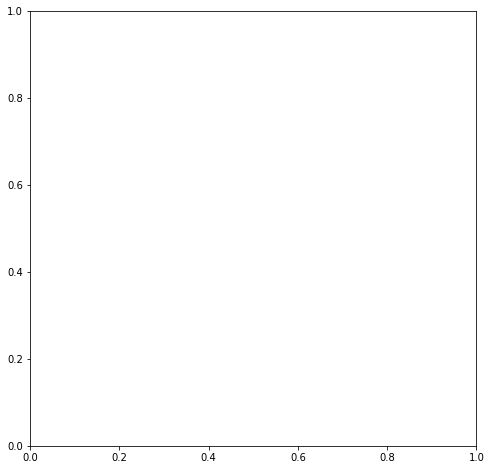

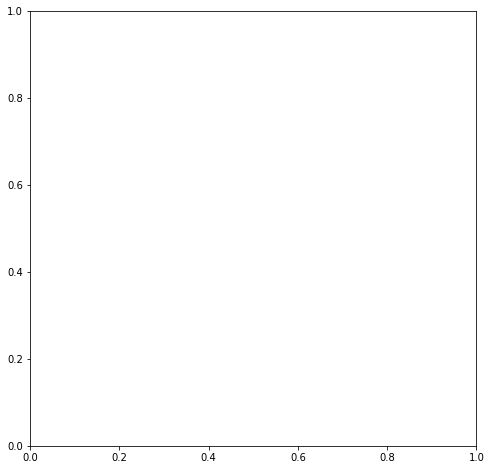

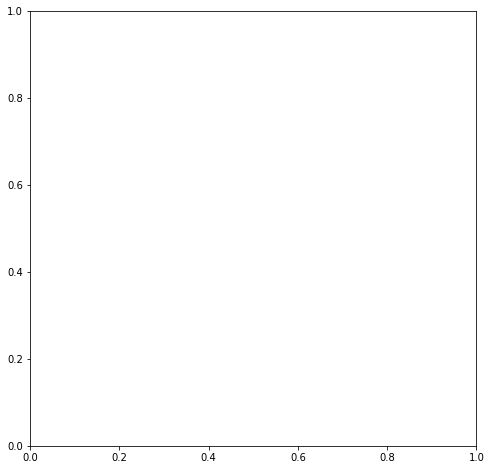

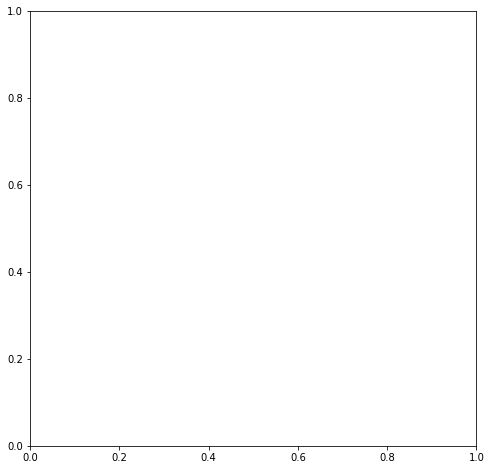

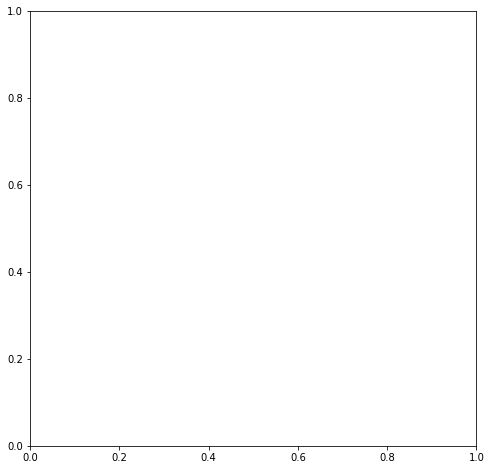

In [17]:
for i in range(0,len(F.Q_sim)):
    if i % 5 == 0:
        F.Q = F.Q_sim[i]
        F.P = F.P_sim[i]
        F.p = F.p_sim[i]
        F.q = F.q_sim[i]
        
        q = F.plot(arrow_width=0.1)
        q.savefig('sim_pic/'+str(i)+'.png')
        plt.cla()

In [18]:
F.Q

array([[60.80577682, 61.90023088],
       [61.60289646, 55.98595373],
       [60.03866131, 67.75282308],
       [60.79573116, 61.89375367],
       [65.53703123, 65.51738667],
       [61.59753433, 55.99546782],
       [61.59503802, 55.99331731],
       [66.33370521, 59.62194128],
       [60.80463034, 61.8966002 ],
       [66.32843468, 59.60427592],
       [60.79773875, 61.90801421],
       [60.8080213 , 61.9045011 ],
       [70.99465324, 63.21988147],
       [66.33347718, 59.61801407],
       [65.52667884, 65.50205212],
       [65.54879689, 65.51402556],
       [66.33582155, 59.6170765 ],
       [60.80880319, 61.89281841],
       [60.81308705, 61.88042142],
       [65.52513562, 65.51774819],
       [65.54651027, 65.51069348],
       [61.62254808, 55.98048271],
       [61.63252349, 55.9753317 ],
       [66.33540521, 59.60898635],
       [67.08033233, 53.72297513],
       [61.62655638, 55.98125365],
       [65.53048311, 65.50305013],
       [66.32033015, 59.61447193],
       [56.10538833,